In [1]:
# !pip install hmmlearn

# Importing necessary Libraries

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt # a comprehensive library for data visualization
import os # functions for interacting with the operating system
import tensorflow as tf
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split # preprocessing datasets
from tensorflow.keras.utils import to_categorical #create one-hot-encoded output
from sklearn.utils import class_weight #calculate class weights for training using the labels
## Tools for building Recurrent Neural Networks applied in this project
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer #A text tokenizer to vectorize a text corpus
from tensorflow.keras.models import Sequential #Sequential model methods
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Embedding, Flatten, Dense, SimpleRNN, Activation, Embedding, LSTM, Bidirectional #The applicable layers used in RNN model
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score # final metrics
#from keras.callbacks.callbacks import EarlyStopping # to monitor training and stop when metrics stop improving
## Extra tools needed for review data preprocessing
from sklearn.multiclass import OneVsRestClassifier
from keras.utils.vis_utils import plot_model
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, GRU, Flatten, BatchNormalization, Bidirectional
import re
from keras.layers import CuDNNLSTM, Dropout, Dense,Conv1D, MaxPooling1D
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from hmmlearn import hmm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import chart_studio.plotly as py
stops = set(stopwords.words('english'))

Importing cleaned dataset extracted from previous workbook 

In [3]:
new_df = pd.read_csv('adverse drugs.csv')

In [4]:
new_df

,Unnamed: 0.1,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,review_clean,count_word,...,review_label,review_clean_label,clean_review_sentiment,review_polarity,review_clean_polarity,Rating_Label,year,month,day,category
0,0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,no side effect take combin bystol mg fish oil,9,...,Negative,Negative,0.000000,0,0,1.0,2012,5,20,Angiotensin II receptor antagonists
1,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,son halfway fourth week intuniv becam concern ...,65,...,Positive,Positive,0.114583,1,1,1.0,2010,4,27,NaN
2,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,use take anoth oral contracept pill cycl happi...,71,...,Positive,Positive,0.105000,1,1,1.0,2009,12,14,NaN
3,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,first time use form birth control glad went pa...,39,...,Positive,Positive,0.300000,1,1,1.0,2015,11,3,NaN
4,4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,suboxon complet turn life around feel healthie...,59,...,Positive,Positive,0.147037,1,1,1.0,2016,11,27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211242,53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,2014-09-13,43,taken tamoxifen year side effect sever sweat d...,51,...,Positive,Negative,-0.078571,1,0,1.0,2014,9,13,NaN
211243,53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,2016-10-08,11,take lexapro escitaploprgram sinc februari fir...,72,...,Positive,Positive,0.106238,1,1,1.0,2016,10,8,NaN
211244,53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,2010-11-15,7,marri year old no kid take pill hassl decid ge...,69,...,Negative,Positive,0.069949,0,1,1.0,2010,11,15,NaN
211245,53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,2011-11-28,20,prescrib nucynta sever neck shoulder pain take...,18,...,Negative,Negative,0.000000,0,0,0.0,2011,11,28,Analgesics (mixed opiate receptor agonists/ an...


In [5]:
new_df['drugName'].nunique()

3645

In [6]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10)

In [7]:
# features= new_df['review_clean'].astype(str)
# target = new_df['Rating_Label']

# Applying Smote for balancing

In [8]:
# ## Balancing of the dataset by the application of smoting
# sm = SMOTE()
# X_res, y_res = sm.fit_resample(features, target)

In [9]:

x = new_df['review_clean'].astype(str)
y = new_df['Rating_Label']

# Model Parameters
LENGTH = 50
N = len(x)
DEPTH = 300    # Output Dimension

# Read a part of the reviews and create training sequences (x_train)

samples = x.iloc[:N]
# tokenizer = Tokenizer(num_words = WORDS)
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
x_train_sec = pad_sequences(sequences, maxlen = LENGTH, padding='post')
WORDS = np.amax(x_train_sec)+1

# Convert the labels to one_hot_category values
one_hot_labels = to_categorical(y[:N], num_classes = 2)

In [10]:
x_train_sec.shape,one_hot_labels.shape

((211247, 50), (211247, 2))

In [11]:
# We use the same plotting commands several times, so create a function for that purpose
def plot_history(history):
    
    f, ax = plt.subplots(1, 2, figsize = (16, 7))
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.sca(ax[0])
    plt.plot(epochs, acc, 'y', label='Training acc', color='blue')
    plt.plot(epochs, val_acc, 'b', label='Validation acc',color='red')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.sca(ax[1])
    plt.plot(epochs, loss, 'y', label='Training loss', color='blue')
    plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [12]:
def train_model(model, x, y, e = 10, bs = 64, v = 1, vs = 0.3):
    h = model.fit(x, y, epochs = e, batch_size = bs, verbose = v, validation_split = vs, callbacks=[es])
    return h

# Building the first Model with Embedding model and dropout of  10%

In [13]:
# First Experiment with Embedding Layer and Hidden Layer
m0 = Sequential()
m0.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m0.add(Flatten())
m0.add(Dropout(0.1))
m0.add(Dense(32, activation = 'relu'))

m0.add(Dense(2, activation = 'softmax'))
m0.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           300000    
                                                                 
 flatten (Flatten)           (None, 15000)             0         
                                                                 
 dropout (Dropout)           (None, 15000)             0         
                                                                 
 dense (Dense)               (None, 32)                480032    
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 780,098
Trainable params: 780,098
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 61s 26ms/step - loss: 0.3748 - acc: 0.8331 - val_loss: 0.3433 - val_acc: 0.8505
Epoch 2/10
2311/2311 [==============================] - 58s 25ms/step - loss: 0.2819 - acc: 0.8807 - val_loss: 0.3215 - val_acc: 0.8682
Epoch 3/10
2311/2311 [==============================] - 60s 26ms/step - loss: 0.2038 - acc: 0.9165 - val_loss: 0.3305 - val_acc: 0.8772
Epoch 4/10
2311/2311 [==============================] - 62s 27ms/step - loss: 0.1465 - acc: 0.9410 - val_loss: 0.3646 - val_acc: 0.8859
Epoch 5/10
2311/2311 [==============================] - 67s 29ms/step - loss: 0.1108 - acc: 0.9570 - val_loss: 0.4077 - val_acc: 0.8923
Epoch 6/10
2311/2311 [==============================] - 68s 30ms/step - loss: 0.0888 - acc: 0.9662 - val_loss: 0.4752 - val_acc: 0.8970
Epoch 7/10
2311/2311 [==============================] - 66s 29ms/step - loss: 0.0727 - acc: 0.9730 - val_loss: 0.5405 - val_acc: 0.8942
Epoch 8/10
2311/2311 [==========================

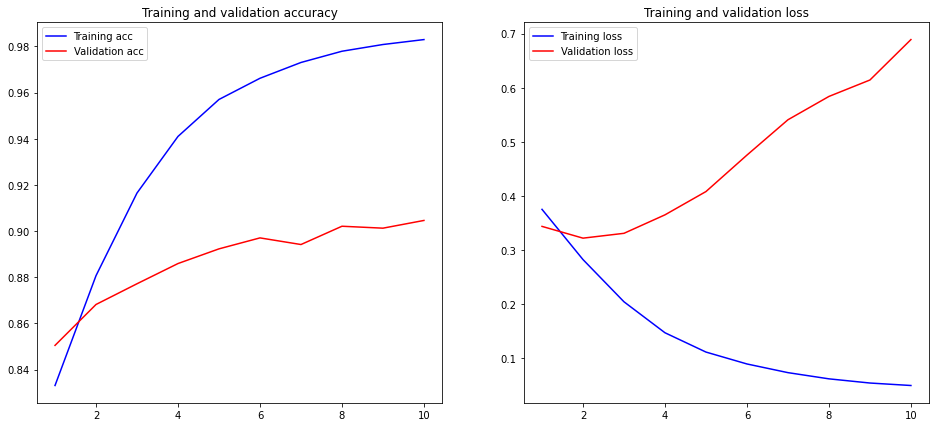

In [14]:
#Training the model for the first experiment
%time h0 = train_model(m0, x_train_sec, one_hot_labels)
plot_history(h0)

# Building the first Model with Embedding layer and 20% dropout

In [15]:
# Second Experiment with Embedding Layer and Hidden Layer

m01 = Sequential()
m01.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m01.add(Flatten())
m01.add(Dropout(0.2))
m01.add(Dense(32, activation = 'relu'))

m01.add(Dense(2, activation = 'softmax'))
m01.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m01.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 300)           300000    
                                                                 
 flatten_1 (Flatten)         (None, 15000)             0         
                                                                 
 dropout_1 (Dropout)         (None, 15000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                480032    
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 780,098
Trainable params: 780,098
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 67s 29ms/step - loss: 0.3765 - acc: 0.8325 - val_loss: 0.3424 - val_acc: 0.8503
Epoch 2/10
2311/2311 [==============================] - 66s 28ms/step - loss: 0.2816 - acc: 0.8819 - val_loss: 0.3189 - val_acc: 0.8698
Epoch 3/10
2311/2311 [==============================] - 66s 29ms/step - loss: 0.2082 - acc: 0.9156 - val_loss: 0.3261 - val_acc: 0.8802
Epoch 4/10
2311/2311 [==============================] - 66s 28ms/step - loss: 0.1580 - acc: 0.9364 - val_loss: 0.3505 - val_acc: 0.8892
Epoch 5/10
2311/2311 [==============================] - 66s 28ms/step - loss: 0.1258 - acc: 0.9495 - val_loss: 0.3903 - val_acc: 0.8924
Epoch 6/10
2311/2311 [==============================] - 66s 28ms/step - loss: 0.1039 - acc: 0.9591 - val_loss: 0.4247 - val_acc: 0.8990
Epoch 7/10
2311/2311 [==============================] - 67s 29ms/step - loss: 0.0873 - acc: 0.9649 - val_loss: 0.4719 - val_acc: 0.8993
Epoch 8/10
2311/2311 [==========================

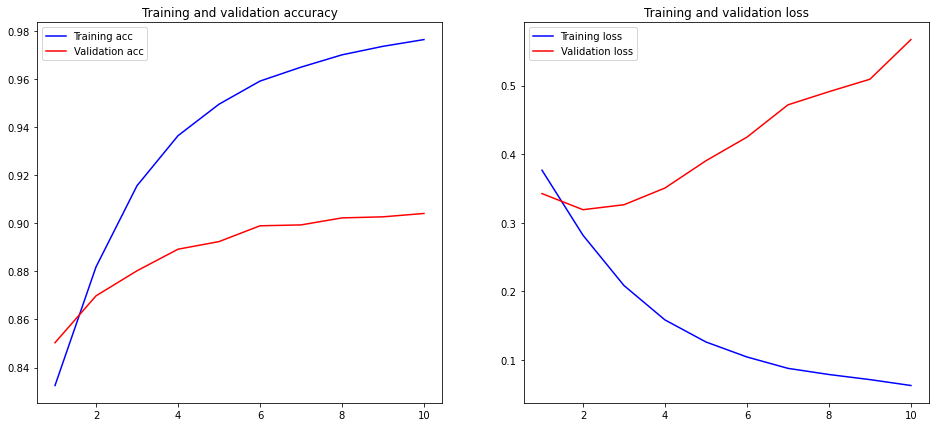

In [16]:
#Training the model for the second experiment
%time h01 = train_model(m01, x_train_sec, one_hot_labels)
plot_history(h01)

# Building the first Model with Embedding layer and 30% dropout

In [17]:
# Third Experiment with Embedding & Dense Classifier

m02 = Sequential()
m02.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m02.add(Flatten())
m02.add(Dense(32, activation = 'relu'))
m02.add(Dropout(0.3))

m02.add(Dense(2, activation = 'softmax'))
m02.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m02.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 300)           300000    
                                                                 
 flatten_2 (Flatten)         (None, 15000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                480032    
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 780,098
Trainable params: 780,098
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 34s 14ms/step - loss: 0.3843 - acc: 0.8299 - val_loss: 0.3480 - val_acc: 0.8461
Epoch 2/10
2311/2311 [==============================] - 33s 14ms/step - loss: 0.2964 - acc: 0.8719 - val_loss: 0.3264 - val_acc: 0.8638
Epoch 3/10
2311/2311 [==============================] - 33s 14ms/step - loss: 0.2274 - acc: 0.9037 - val_loss: 0.3260 - val_acc: 0.8744
Epoch 4/10
2311/2311 [==============================] - 33s 14ms/step - loss: 0.1783 - acc: 0.9249 - val_loss: 0.3612 - val_acc: 0.8821
Epoch 5/10
2311/2311 [==============================] - 33s 14ms/step - loss: 0.1466 - acc: 0.9370 - val_loss: 0.3986 - val_acc: 0.8873
Epoch 6/10
2311/2311 [==============================] - 33s 14ms/step - loss: 0.1286 - acc: 0.9443 - val_loss: 0.4324 - val_acc: 0.8877
Epoch 7/10
2311/2311 [==============================] - 34s 14ms/step - loss: 0.1119 - acc: 0.9506 - val_loss: 0.4699 - val_acc: 0.8925
Epoch 8/10
2311/2311 [==========================

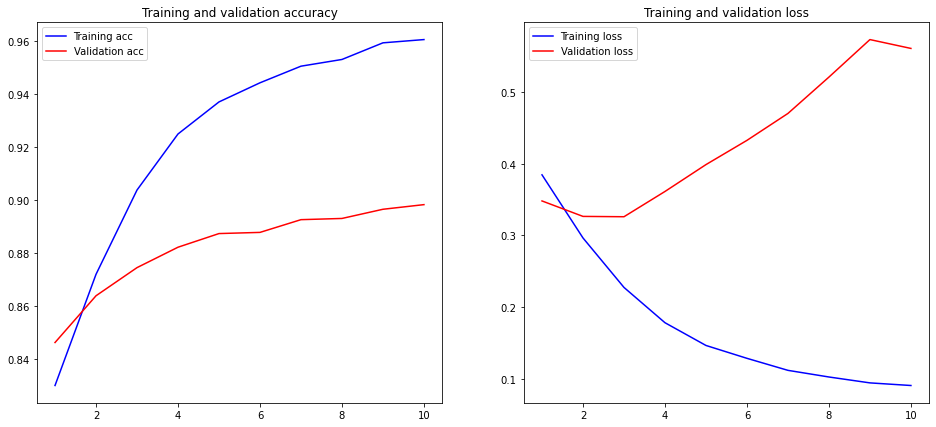

In [18]:
# Training the model for the third experiment
%time h02 = train_model(m02, x_train_sec, one_hot_labels)
plot_history(h02)

# Building the first model with Embedding layer, 1 hidden layer and 40% dropout

In [19]:
# Fourth Experiment with Embedding & Dense Classifier

m03 = Sequential()
m03.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m03.add(Flatten())
m03.add(Dense(32, activation = 'relu'))
m03.add(Dropout(0.4))

m03.add(Dense(2, activation = 'softmax'))
m03.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m03.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 300)           300000    
                                                                 
 flatten_3 (Flatten)         (None, 15000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                480032    
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 780,098
Trainable params: 780,098
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 35s 15ms/step - loss: 0.3882 - acc: 0.8289 - val_loss: 0.3489 - val_acc: 0.8459
Epoch 2/10
2311/2311 [==============================] - 35s 15ms/step - loss: 0.3060 - acc: 0.8659 - val_loss: 0.3291 - val_acc: 0.8586
Epoch 3/10
2311/2311 [==============================] - 35s 15ms/step - loss: 0.2467 - acc: 0.8920 - val_loss: 0.3268 - val_acc: 0.8699
Epoch 4/10
2311/2311 [==============================] - 34s 15ms/step - loss: 0.2016 - acc: 0.9102 - val_loss: 0.3595 - val_acc: 0.8771
Epoch 5/10
2311/2311 [==============================] - 34s 15ms/step - loss: 0.1712 - acc: 0.9231 - val_loss: 0.3890 - val_acc: 0.8805
Epoch 6/10
2311/2311 [==============================] - 34s 15ms/step - loss: 0.1505 - acc: 0.9308 - val_loss: 0.4317 - val_acc: 0.8847
Epoch 7/10
2311/2311 [==============================] - 34s 15ms/step - loss: 0.1373 - acc: 0.9382 - val_loss: 0.4628 - val_acc: 0.8861
Epoch 8/10
2311/2311 [==========================

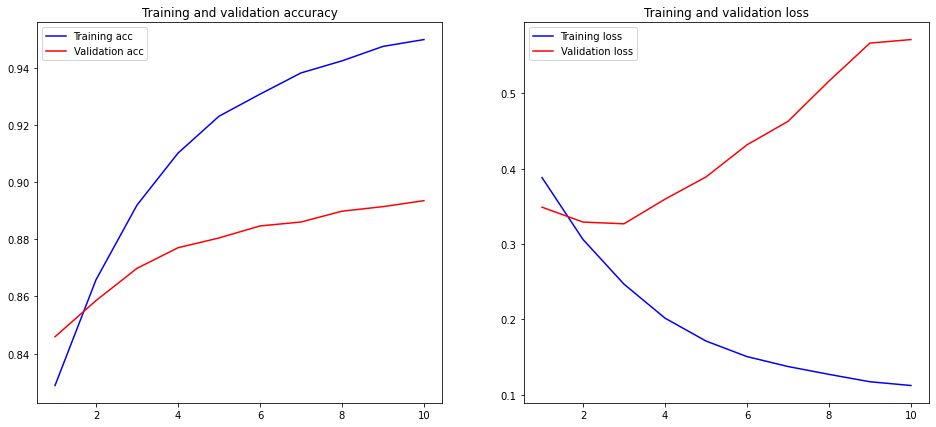

In [20]:
# Training the model for the fourth experiment
%time h03 = train_model(m03, x_train_sec, one_hot_labels)
plot_history(h03)

# Building the first model with Embedding layer, an increased dense layer and 10% dropout

In [21]:
# Fifth Experiment with Embedding & Dense Classifier
m04 = Sequential()
m04.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m04.add(Flatten())
m04.add(Dense(64, activation = 'relu'))
m04.add(Dropout(0.1))

m04.add(Dense(2, activation = 'softmax'))
m04.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m04.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 300)           300000    
                                                                 
 flatten_4 (Flatten)         (None, 15000)             0         
                                                                 
 dense_8 (Dense)             (None, 64)                960064    
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1,260,194
Trainable params: 1,260,194
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 44s 19ms/step - loss: 0.3758 - acc: 0.8351 - val_loss: 0.3429 - val_acc: 0.8501
Epoch 2/10
2311/2311 [==============================] - 44s 19ms/step - loss: 0.2759 - acc: 0.8852 - val_loss: 0.3136 - val_acc: 0.8712
Epoch 3/10
2311/2311 [==============================] - 44s 19ms/step - loss: 0.1841 - acc: 0.9259 - val_loss: 0.3267 - val_acc: 0.8873
Epoch 4/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.1213 - acc: 0.9518 - val_loss: 0.3761 - val_acc: 0.8955
Epoch 5/10
2311/2311 [==============================] - 45s 19ms/step - loss: 0.0883 - acc: 0.9658 - val_loss: 0.4768 - val_acc: 0.8999
Epoch 6/10
2311/2311 [==============================] - 44s 19ms/step - loss: 0.0712 - acc: 0.9728 - val_loss: 0.5158 - val_acc: 0.9027
Epoch 7/10
2311/2311 [==============================] - 44s 19ms/step - loss: 0.0586 - acc: 0.9782 - val_loss: 0.5764 - val_acc: 0.8997
Epoch 8/10
2311/2311 [==========================

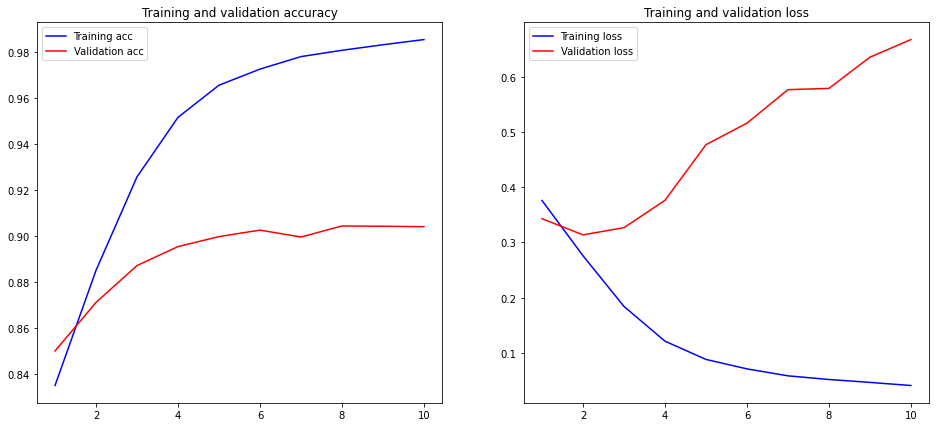

In [22]:
# Training the model for the fifth experiment
%time h04 = train_model(m04, x_train_sec, one_hot_labels)
plot_history(h04)

# Building the first model with Embedding layer, an increased hidden layer and 20% dropout

In [23]:
# Sixth Experiment with Embedding & Dense Classifier
m05 = Sequential()
m05.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m05.add(Flatten())
m05.add(Dense(64, activation = 'relu'))
m05.add(Dropout(0.2))

m05.add(Dense(2, activation = 'softmax'))
m05.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m05.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 300)           300000    
                                                                 
 flatten_5 (Flatten)         (None, 15000)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                960064    
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                                 
Total params: 1,260,194
Trainable params: 1,260,194
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 45s 19ms/step - loss: 0.3759 - acc: 0.8339 - val_loss: 0.3517 - val_acc: 0.8458
Epoch 2/10
2311/2311 [==============================] - 44s 19ms/step - loss: 0.2767 - acc: 0.8840 - val_loss: 0.3152 - val_acc: 0.8694
Epoch 3/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.1924 - acc: 0.9220 - val_loss: 0.3304 - val_acc: 0.8848
Epoch 4/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.1342 - acc: 0.9463 - val_loss: 0.3742 - val_acc: 0.8913
Epoch 5/10
2311/2311 [==============================] - 41s 18ms/step - loss: 0.1039 - acc: 0.9583 - val_loss: 0.4162 - val_acc: 0.8946
Epoch 6/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0852 - acc: 0.9661 - val_loss: 0.4639 - val_acc: 0.9030
Epoch 7/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0714 - acc: 0.9727 - val_loss: 0.5336 - val_acc: 0.9017
Epoch 8/10
2311/2311 [==========================

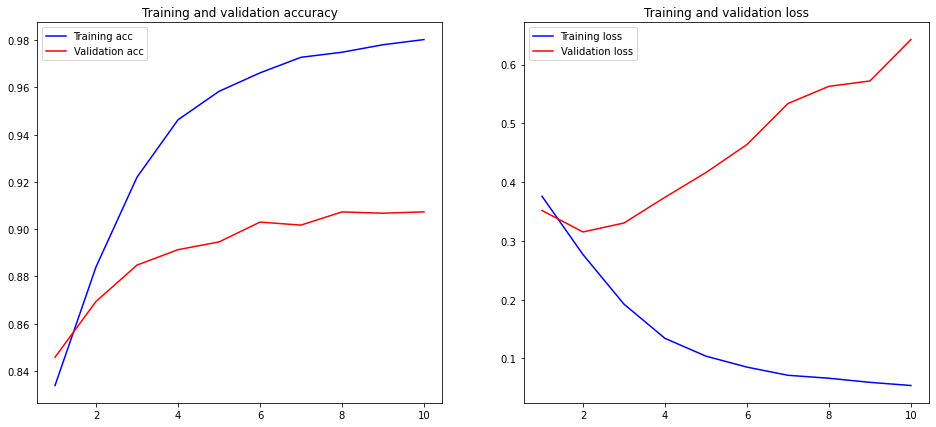

In [24]:
# Training the model for the sixth experiment
%time h05 = train_model(m05, x_train_sec, one_hot_labels)
plot_history(h05)

# Building the first model with Embedding layer, an increased hidden layer and 30% dropout

In [25]:
# Seventh Experiment with Embedding & Dense Classifier
m06 = Sequential()
m06.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m06.add(Flatten())
m06.add(Dense(64, activation = 'relu'))
m06.add(Dropout(0.3))

m06.add(Dense(2, activation = 'softmax'))
m06.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m06.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 50, 300)           300000    
                                                                 
 flatten_6 (Flatten)         (None, 15000)             0         
                                                                 
 dense_12 (Dense)            (None, 64)                960064    
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 2)                 130       
                                                                 
Total params: 1,260,194
Trainable params: 1,260,194
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.3790 - acc: 0.8328 - val_loss: 0.3443 - val_acc: 0.8496
Epoch 2/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.2828 - acc: 0.8806 - val_loss: 0.3176 - val_acc: 0.8676
Epoch 3/10
2311/2311 [==============================] - 41s 18ms/step - loss: 0.2051 - acc: 0.9153 - val_loss: 0.3231 - val_acc: 0.8817
Epoch 4/10
2311/2311 [==============================] - 41s 18ms/step - loss: 0.1521 - acc: 0.9379 - val_loss: 0.3522 - val_acc: 0.8906
Epoch 5/10
2311/2311 [==============================] - 41s 18ms/step - loss: 0.1174 - acc: 0.9524 - val_loss: 0.4021 - val_acc: 0.8949
Epoch 6/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0985 - acc: 0.9595 - val_loss: 0.4558 - val_acc: 0.8986
Epoch 7/10
2311/2311 [==============================] - 41s 18ms/step - loss: 0.0864 - acc: 0.9641 - val_loss: 0.4710 - val_acc: 0.8983
Epoch 8/10
2311/2311 [==========================

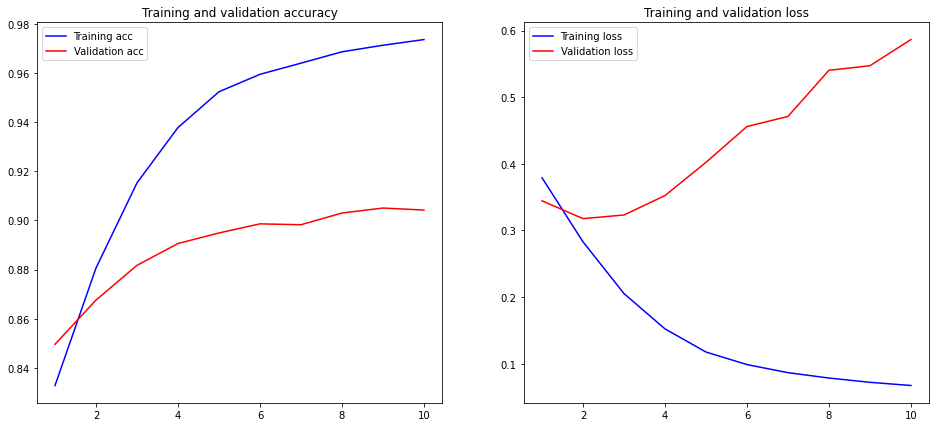

In [26]:
# Training the model for the seventh experiment
%time h06 = train_model(m06, x_train_sec, one_hot_labels)
plot_history(h06)

# Building the first model with Embedding layer, an increased hidden layer and 40% dropout

In [27]:
# Eithth Experiment with Embedding & Dense Classifier
m07 = Sequential()
m07.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m07.add(Flatten())
m07.add(Dense(64, activation = 'relu'))
m07.add(Dropout(0.4))

m07.add(Dense(2, activation = 'softmax'))
m07.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m07.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 50, 300)           300000    
                                                                 
 flatten_7 (Flatten)         (None, 15000)             0         
                                                                 
 dense_14 (Dense)            (None, 64)                960064    
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 2)                 130       
                                                                 
Total params: 1,260,194
Trainable params: 1,260,194
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.3828 - acc: 0.8297 - val_loss: 0.3445 - val_acc: 0.8488
Epoch 2/10
2311/2311 [==============================] - 41s 18ms/step - loss: 0.2923 - acc: 0.8752 - val_loss: 0.3207 - val_acc: 0.8653
Epoch 3/10
2311/2311 [==============================] - 41s 18ms/step - loss: 0.2208 - acc: 0.9078 - val_loss: 0.3325 - val_acc: 0.8763
Epoch 4/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.1688 - acc: 0.9290 - val_loss: 0.3729 - val_acc: 0.8879
Epoch 5/10
2311/2311 [==============================] - 41s 18ms/step - loss: 0.1372 - acc: 0.9430 - val_loss: 0.3821 - val_acc: 0.8911
Epoch 6/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.1184 - acc: 0.9506 - val_loss: 0.4261 - val_acc: 0.8943
Epoch 7/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.1050 - acc: 0.9552 - val_loss: 0.4908 - val_acc: 0.8964
Epoch 8/10
2311/2311 [==========================

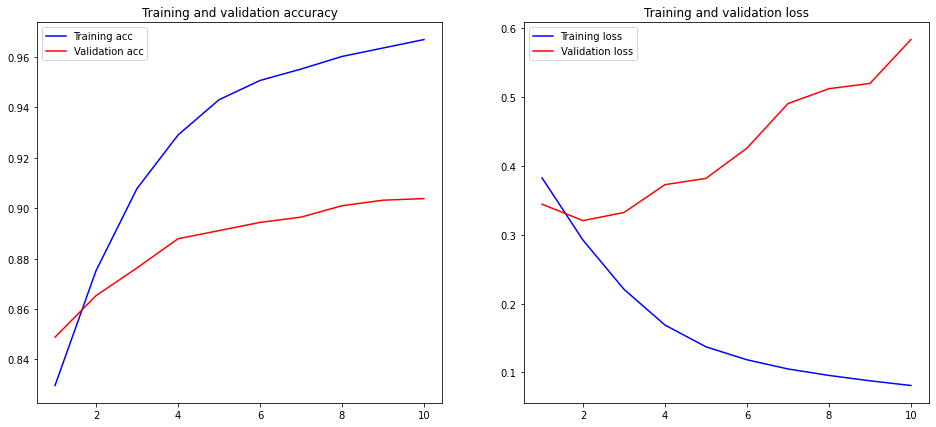

In [28]:
# Training the model for the eighth experiment
%time h07 = train_model(m07, x_train_sec, one_hot_labels)
plot_history(h07)

# Building the first model with Embedding layer, two hidden layers and 10% dropout in each layer

In [29]:
# Nineth Experiment with Embedding & Dense Classifier
m08 = Sequential()
m08.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m08.add(Flatten())
m08.add(Dense(64, activation = 'relu'))
m08.add(Dropout(0.1))

m08.add(Dense(64, activation = 'relu'))
m08.add(Dropout(0.1))

m08.add(Dense(2, activation = 'softmax'))
m08.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m08.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 50, 300)           300000    
                                                                 
 flatten_8 (Flatten)         (None, 15000)             0         
                                                                 
 dense_16 (Dense)            (None, 64)                960064    
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 2)                

Epoch 1/10
2311/2311 [==============================] - 43s 18ms/step - loss: 0.3774 - acc: 0.8336 - val_loss: 0.3408 - val_acc: 0.8516
Epoch 2/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.2754 - acc: 0.8860 - val_loss: 0.3154 - val_acc: 0.8731
Epoch 3/10
2311/2311 [==============================] - 43s 18ms/step - loss: 0.1793 - acc: 0.9289 - val_loss: 0.3135 - val_acc: 0.8877
Epoch 4/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.1182 - acc: 0.9548 - val_loss: 0.3585 - val_acc: 0.8961
Epoch 5/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.0877 - acc: 0.9670 - val_loss: 0.3998 - val_acc: 0.8986
Epoch 6/10
2311/2311 [==============================] - 43s 18ms/step - loss: 0.0718 - acc: 0.9729 - val_loss: 0.4126 - val_acc: 0.9017
Epoch 7/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0589 - acc: 0.9787 - val_loss: 0.4469 - val_acc: 0.9052
Epoch 8/10
2311/2311 [==========================

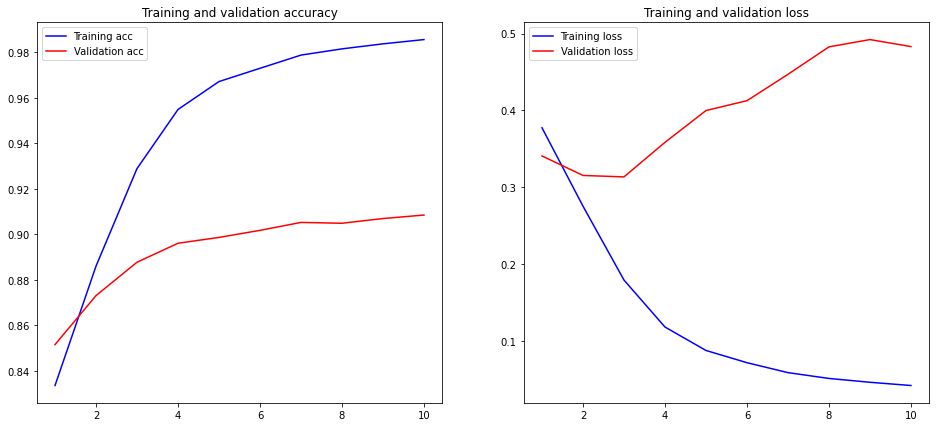

In [30]:
# Training the model for the nineth experiment
%time h08 = train_model(m08, x_train_sec, one_hot_labels)
plot_history(h08)

# Building the first model with Embedding layer, 10% dropout in the first hidden layers and 20% dropout in second hidden layer

In [31]:
# Tenth Experiment with Embedding & Dense Classifier
m09 = Sequential()
m09.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m09.add(Flatten())
m09.add(Dense(64, activation = 'relu'))
m09.add(Dropout(0.1))

m09.add(Dense(64, activation = 'relu'))
m09.add(Dropout(0.2))

m09.add(Dense(2, activation = 'softmax'))
m09.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m09.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 50, 300)           300000    
                                                                 
 flatten_9 (Flatten)         (None, 15000)             0         
                                                                 
 dense_19 (Dense)            (None, 64)                960064    
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 2)                

Epoch 1/10
2311/2311 [==============================] - 43s 18ms/step - loss: 0.3787 - acc: 0.8333 - val_loss: 0.3393 - val_acc: 0.8524
Epoch 2/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.2754 - acc: 0.8851 - val_loss: 0.3096 - val_acc: 0.8734
Epoch 3/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.1772 - acc: 0.9303 - val_loss: 0.3207 - val_acc: 0.8903
Epoch 4/10
2311/2311 [==============================] - 43s 18ms/step - loss: 0.1163 - acc: 0.9549 - val_loss: 0.3532 - val_acc: 0.8966
Epoch 5/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0853 - acc: 0.9679 - val_loss: 0.4021 - val_acc: 0.9021
Epoch 6/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0691 - acc: 0.9742 - val_loss: 0.4588 - val_acc: 0.9037
Epoch 7/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0567 - acc: 0.9792 - val_loss: 0.5008 - val_acc: 0.9059
Epoch 8/10
2311/2311 [==========================

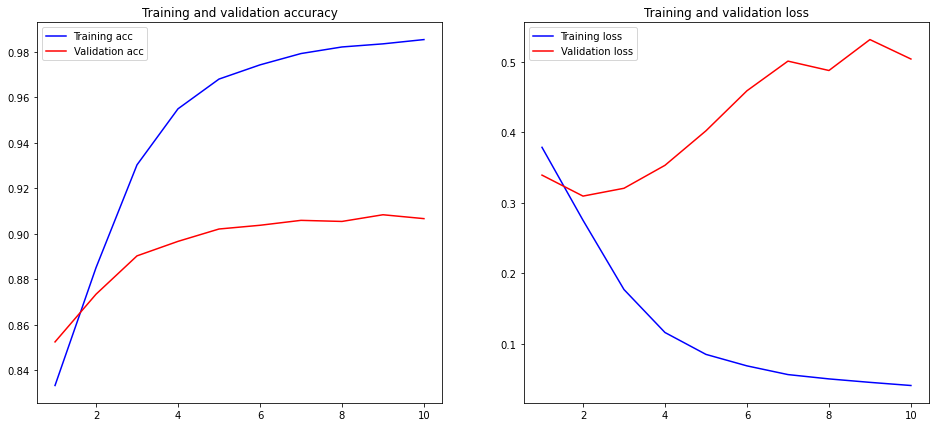

In [32]:
# Training the model for the tenth experiment
%time h09 = train_model(m09, x_train_sec, one_hot_labels)
plot_history(h09)

# Building the first model with Embedding layer, 10% dropout in the first hidden layers and 30% dropout in second hidden layer

In [33]:
# Eleventh Experiment with Embedding & Dense Classifier
m010 = Sequential()
m010.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m010.add(Flatten())
m010.add(Dense(64, activation = 'relu'))
m010.add(Dropout(0.1))

m010.add(Dense(64, activation = 'relu'))
m010.add(Dropout(0.3))

m010.add(Dense(2, activation = 'softmax'))
m010.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m010.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 50, 300)           300000    
                                                                 
 flatten_10 (Flatten)        (None, 15000)             0         
                                                                 
 dense_22 (Dense)            (None, 64)                960064    
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 2)               

Epoch 1/10
2311/2311 [==============================] - 43s 18ms/step - loss: 0.3810 - acc: 0.8323 - val_loss: 0.3471 - val_acc: 0.8465
Epoch 2/10
2311/2311 [==============================] - 43s 18ms/step - loss: 0.2773 - acc: 0.8848 - val_loss: 0.3147 - val_acc: 0.8720
Epoch 3/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.1802 - acc: 0.9284 - val_loss: 0.3130 - val_acc: 0.8900
Epoch 4/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.1171 - acc: 0.9550 - val_loss: 0.3668 - val_acc: 0.8967
Epoch 5/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.0861 - acc: 0.9675 - val_loss: 0.4032 - val_acc: 0.9022
Epoch 6/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0691 - acc: 0.9744 - val_loss: 0.4554 - val_acc: 0.9045
Epoch 7/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0582 - acc: 0.9786 - val_loss: 0.4869 - val_acc: 0.9037
Epoch 8/10
2311/2311 [==========================

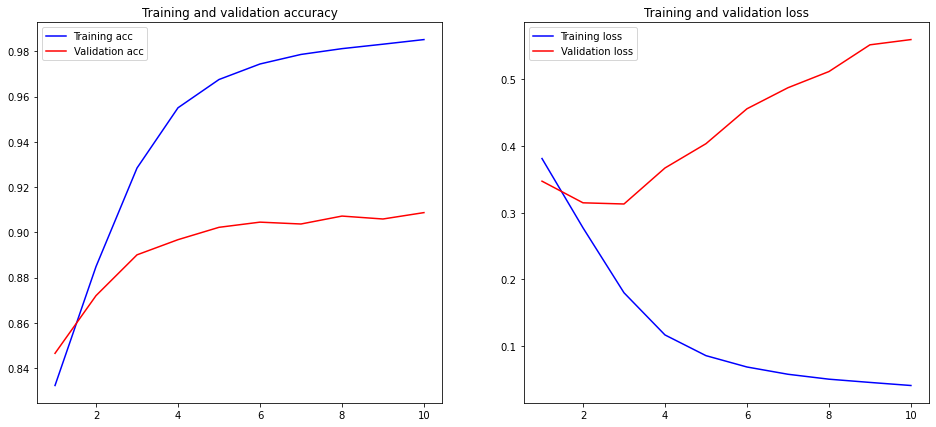

In [34]:
# Training the model for the eleventh experiment
%time h010 = train_model(m010, x_train_sec, one_hot_labels)
plot_history(h010)

# Building the first model with Embedding layer, 10% dropout in the first hidden layers and 40% dropout in second hidden layer

In [35]:
# Twelveth Experiment with Embedding & Dense Classifier
m011 = Sequential()
m011.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m011.add(Flatten())
m011.add(Dense(64, activation = 'relu'))
m011.add(Dropout(0.1))

m011.add(Dense(64, activation = 'relu'))
m011.add(Dropout(0.4))

m011.add(Dense(2, activation = 'softmax'))
m011.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m011.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 50, 300)           300000    
                                                                 
 flatten_11 (Flatten)        (None, 15000)             0         
                                                                 
 dense_25 (Dense)            (None, 64)                960064    
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 2)               

Epoch 1/10
2311/2311 [==============================] - 44s 18ms/step - loss: 0.3845 - acc: 0.8318 - val_loss: 0.3421 - val_acc: 0.8504
Epoch 2/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.2839 - acc: 0.8810 - val_loss: 0.3177 - val_acc: 0.8725
Epoch 3/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.1895 - acc: 0.9242 - val_loss: 0.3225 - val_acc: 0.8872
Epoch 4/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.1278 - acc: 0.9500 - val_loss: 0.3717 - val_acc: 0.8957
Epoch 5/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0940 - acc: 0.9644 - val_loss: 0.4327 - val_acc: 0.8992
Epoch 6/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0753 - acc: 0.9718 - val_loss: 0.4725 - val_acc: 0.9034
Epoch 7/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.0631 - acc: 0.9777 - val_loss: 0.5032 - val_acc: 0.9055
Epoch 8/10
2311/2311 [==========================

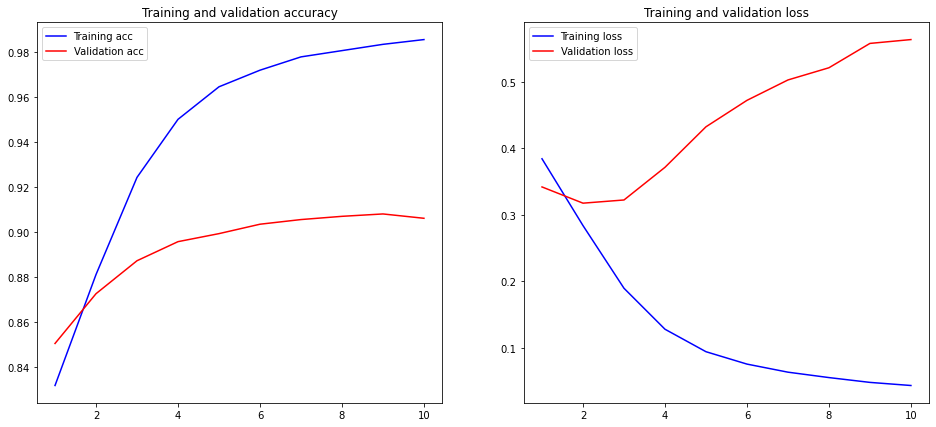

In [36]:
# Training the model for the twelveth experiment
%time h011 = train_model(m011, x_train_sec, one_hot_labels)
plot_history(h011)

# Building the first model with Embedding layer, 10% dropout in all hidden layers

In [37]:
# Thirteen Experiment with Embedding & Dense Classifier
m012 = Sequential()
m012.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m012.add(Flatten())
m012.add(Dense(64, activation = 'relu'))
m012.add(Dropout(0.1))

m012.add(Dense(64, activation = 'relu'))
m012.add(Dropout(0.1))

m012.add(Dense(64, activation = 'relu'))
m012.add(Dropout(0.1))

m012.add(Dense(2, activation = 'softmax'))
m012.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m012.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 50, 300)           300000    
                                                                 
 flatten_12 (Flatten)        (None, 15000)             0         
                                                                 
 dense_28 (Dense)            (None, 64)                960064    
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 64)              

Epoch 1/10
2311/2311 [==============================] - 45s 19ms/step - loss: 0.3795 - acc: 0.8321 - val_loss: 0.3434 - val_acc: 0.8497
Epoch 2/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.2791 - acc: 0.8835 - val_loss: 0.3101 - val_acc: 0.8721
Epoch 3/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.1864 - acc: 0.9253 - val_loss: 0.3123 - val_acc: 0.8858
Epoch 4/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.1240 - acc: 0.9519 - val_loss: 0.3628 - val_acc: 0.8929
Epoch 5/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0942 - acc: 0.9645 - val_loss: 0.4120 - val_acc: 0.9020
Epoch 6/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.0744 - acc: 0.9724 - val_loss: 0.4188 - val_acc: 0.9041
Epoch 7/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.0616 - acc: 0.9777 - val_loss: 0.4907 - val_acc: 0.9050
Epoch 8/10
2311/2311 [==========================

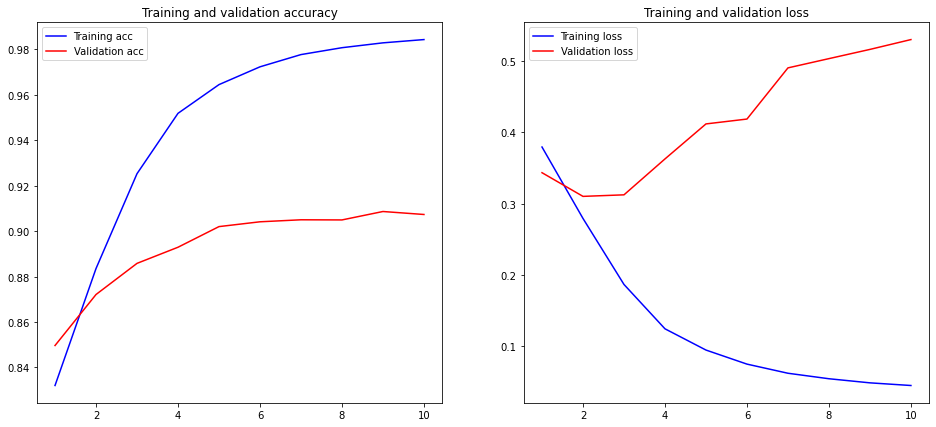

In [38]:
# Training the model for the thirteenth experiment
%time h012 = train_model(m012, x_train_sec, one_hot_labels)
plot_history(h012)

# Building the first model with Embedding layer, 10% dropout in the first hidden layers, 10% dropout in the second hidden layer and 20% dropout in the third hidden layer

In [39]:
# Fourteenth Experiment with Embedding & Dense Classifier
m013 = Sequential()
m013.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m013.add(Flatten())
m013.add(Dense(64, activation = 'relu'))
m013.add(Dropout(0.1))

m013.add(Dense(64, activation = 'relu'))
m013.add(Dropout(0.1))

m013.add(Dense(64, activation = 'relu'))
m013.add(Dropout(0.2))

m013.add(Dense(2, activation = 'softmax'))
m013.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m013.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 50, 300)           300000    
                                                                 
 flatten_13 (Flatten)        (None, 15000)             0         
                                                                 
 dense_32 (Dense)            (None, 64)                960064    
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 64)              

Epoch 1/10
2311/2311 [==============================] - 44s 18ms/step - loss: 0.3821 - acc: 0.8316 - val_loss: 0.3436 - val_acc: 0.8502
Epoch 2/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.2795 - acc: 0.8838 - val_loss: 0.3103 - val_acc: 0.8707
Epoch 3/10
2311/2311 [==============================] - 44s 19ms/step - loss: 0.1859 - acc: 0.9269 - val_loss: 0.3239 - val_acc: 0.8860
Epoch 4/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.1248 - acc: 0.9513 - val_loss: 0.3244 - val_acc: 0.8957
Epoch 5/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0934 - acc: 0.9647 - val_loss: 0.3678 - val_acc: 0.9022
Epoch 6/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.0761 - acc: 0.9718 - val_loss: 0.4343 - val_acc: 0.9033
Epoch 7/10
2311/2311 [==============================] - 43s 18ms/step - loss: 0.0645 - acc: 0.9766 - val_loss: 0.4879 - val_acc: 0.9045
Epoch 8/10
2311/2311 [==========================

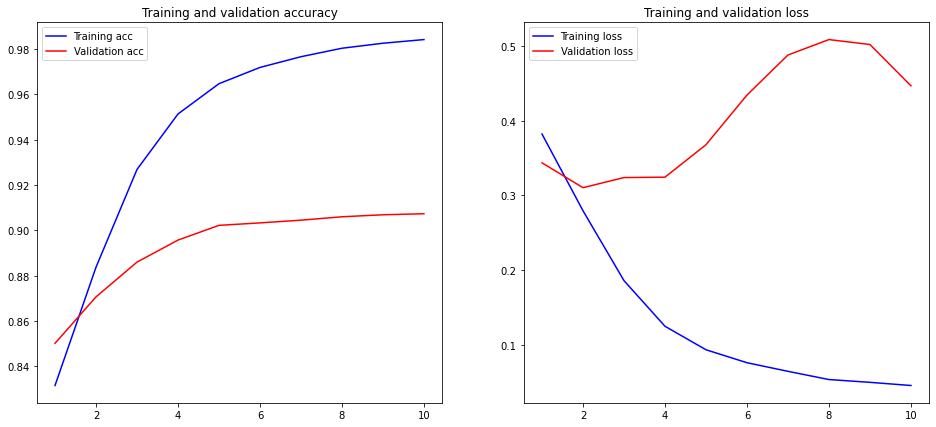

In [40]:
# Training the model for the fourteenth experiment
%time h013 = train_model(m013, x_train_sec, one_hot_labels)
plot_history(h013)

# Building the first model with Embedding layer, 10% dropout in the first hidden layers, 10% dropout in the second hidden layer and 30% dropout in the third hidden layer

In [41]:
# Fifteenth Experiment with Embedding & Dense Classifier
m014 = Sequential()
m014.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m014.add(Flatten())
m014.add(Dense(64, activation = 'relu'))
m014.add(Dropout(0.1))

m014.add(Dense(64, activation = 'relu'))
m014.add(Dropout(0.1))

m014.add(Dense(64, activation = 'relu'))
m014.add(Dropout(0.3))

m014.add(Dense(2, activation = 'softmax'))
m014.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m014.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 50, 300)           300000    
                                                                 
 flatten_14 (Flatten)        (None, 15000)             0         
                                                                 
 dense_36 (Dense)            (None, 64)                960064    
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 64)              

Epoch 1/10
2311/2311 [==============================] - 44s 19ms/step - loss: 0.3820 - acc: 0.8323 - val_loss: 0.3404 - val_acc: 0.8522
Epoch 2/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.2786 - acc: 0.8844 - val_loss: 0.3145 - val_acc: 0.8725
Epoch 3/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.1870 - acc: 0.9260 - val_loss: 0.3224 - val_acc: 0.8877
Epoch 4/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.1255 - acc: 0.9510 - val_loss: 0.3689 - val_acc: 0.8964
Epoch 5/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.0934 - acc: 0.9645 - val_loss: 0.4011 - val_acc: 0.8998
Epoch 6/10
2311/2311 [==============================] - 44s 19ms/step - loss: 0.0780 - acc: 0.9705 - val_loss: 0.4251 - val_acc: 0.9036
Epoch 7/10
2311/2311 [==============================] - 44s 19ms/step - loss: 0.0652 - acc: 0.9752 - val_loss: 0.4664 - val_acc: 0.9046
Epoch 8/10
2311/2311 [==========================

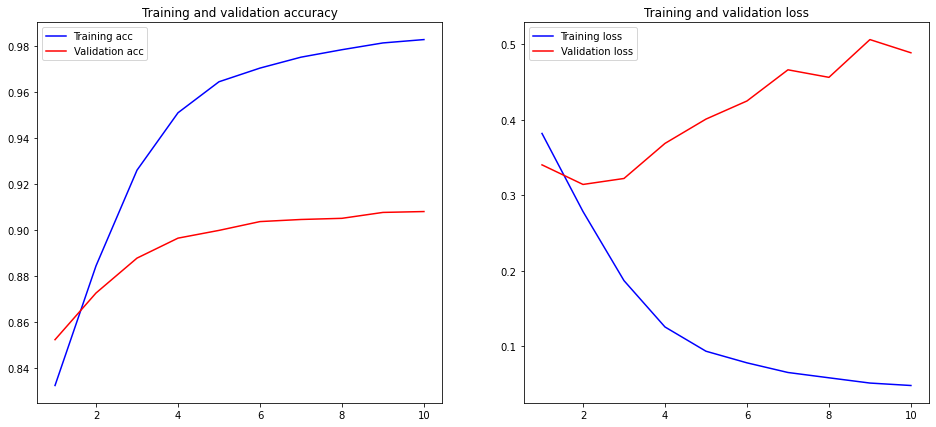

In [42]:
# Training the model for the fifteenth experiment
%time h014 = train_model(m014, x_train_sec, one_hot_labels)
plot_history(h014)

# Building the first model with Embedding layer, 10% dropout in the first hidden layers, 10% dropout in the second hidden layer and 40% dropout in the third hidden layer

In [43]:
# Sixteenth Experiment with Embedding & Dense Classifier
m015 = Sequential()
m015.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m015.add(Flatten())
m015.add(Dense(64, activation = 'relu'))
m015.add(Dropout(0.1))

m015.add(Dense(64, activation = 'relu'))
m015.add(Dropout(0.1))

m015.add(Dense(64, activation = 'relu'))
m015.add(Dropout(0.4))

m015.add(Dense(2, activation = 'softmax'))
m015.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m015.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 50, 300)           300000    
                                                                 
 flatten_15 (Flatten)        (None, 15000)             0         
                                                                 
 dense_40 (Dense)            (None, 64)                960064    
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 64)              

Epoch 1/10
2311/2311 [==============================] - 45s 19ms/step - loss: 0.3831 - acc: 0.8322 - val_loss: 0.3501 - val_acc: 0.8459
Epoch 2/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.2798 - acc: 0.8844 - val_loss: 0.3085 - val_acc: 0.8738
Epoch 3/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.1857 - acc: 0.9265 - val_loss: 0.3254 - val_acc: 0.8878
Epoch 4/10
2311/2311 [==============================] - 43s 19ms/step - loss: 0.1242 - acc: 0.9527 - val_loss: 0.3527 - val_acc: 0.8958
Epoch 5/10
2311/2311 [==============================] - 42s 18ms/step - loss: 0.0909 - acc: 0.9662 - val_loss: 0.4026 - val_acc: 0.9006
Epoch 6/10
2311/2311 [==============================] - 44s 19ms/step - loss: 0.0726 - acc: 0.9734 - val_loss: 0.4473 - val_acc: 0.9030
Epoch 7/10
2311/2311 [==============================] - 44s 19ms/step - loss: 0.0611 - acc: 0.9777 - val_loss: 0.4578 - val_acc: 0.9036
Epoch 8/10
2311/2311 [==========================

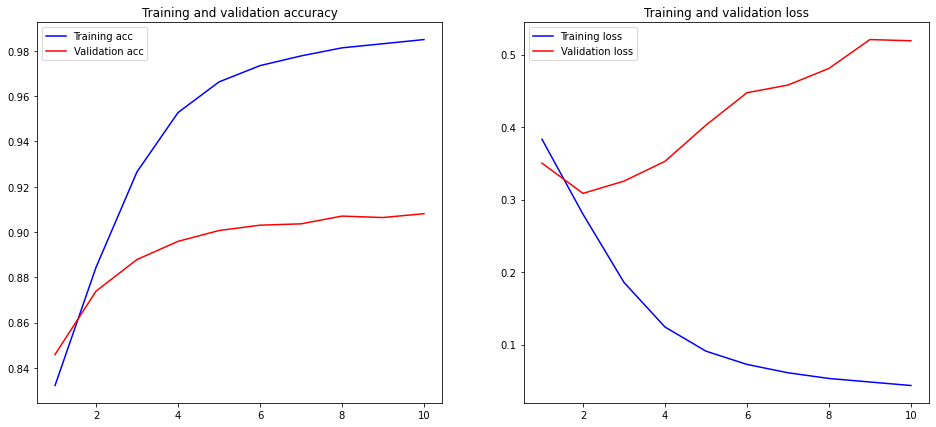

In [44]:
# Training the model for the sixteenth experiment
%time h015 = train_model(m015, x_train_sec, one_hot_labels)
plot_history(h015)

# Building the first model with Embedding layer, 10% dropout and one hidden layer

In [45]:
# Seventeenth Experiment with Embedding & Dense Classifier
m016 = Sequential()
m016.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m016.add(Flatten())
m016.add(Dense(128, activation = 'relu'))
m016.add(Dropout(0.1))

m016.add(Dense(2, activation = 'softmax'))
m016.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m016.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 50, 300)           300000    
                                                                 
 flatten_16 (Flatten)        (None, 15000)             0         
                                                                 
 dense_44 (Dense)            (None, 128)               1920128   
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_45 (Dense)            (None, 2)                 258       
                                                                 
Total params: 2,220,386
Trainable params: 2,220,386
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 60s 26ms/step - loss: 0.3732 - acc: 0.8358 - val_loss: 0.3392 - val_acc: 0.8524
Epoch 2/10
2311/2311 [==============================] - 59s 25ms/step - loss: 0.2672 - acc: 0.8890 - val_loss: 0.3082 - val_acc: 0.8771
Epoch 3/10
2311/2311 [==============================] - 59s 26ms/step - loss: 0.1641 - acc: 0.9353 - val_loss: 0.3388 - val_acc: 0.8888
Epoch 4/10
2311/2311 [==============================] - 59s 26ms/step - loss: 0.1015 - acc: 0.9609 - val_loss: 0.3997 - val_acc: 0.8993
Epoch 5/10
2311/2311 [==============================] - 59s 26ms/step - loss: 0.0707 - acc: 0.9738 - val_loss: 0.4621 - val_acc: 0.9024
Epoch 6/10
2311/2311 [==============================] - 60s 26ms/step - loss: 0.0552 - acc: 0.9798 - val_loss: 0.5305 - val_acc: 0.9052
Epoch 7/10
2311/2311 [==============================] - 60s 26ms/step - loss: 0.0457 - acc: 0.9835 - val_loss: 0.5708 - val_acc: 0.9055
Epoch 8/10
2311/2311 [==========================

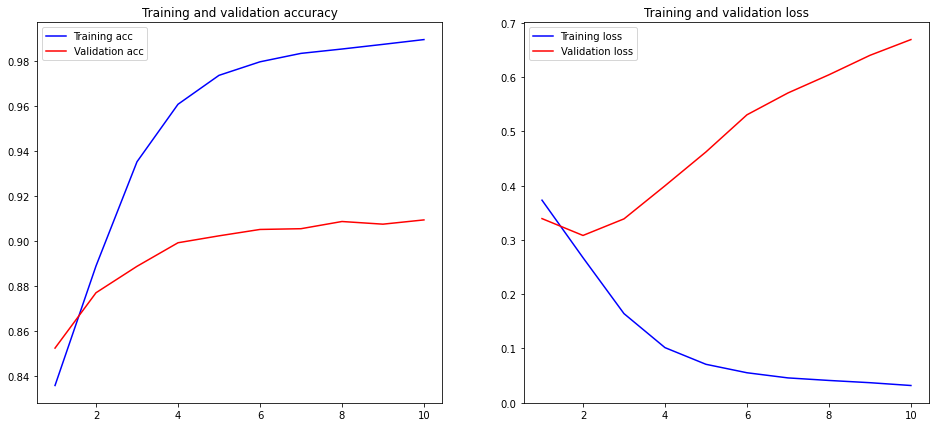

In [46]:
# Training the model for the seventeenth experiment
%time h016 = train_model(m016, x_train_sec, one_hot_labels)
plot_history(h016)

# Building the first model with Embedding layer, 20% dropout and one hidden layer

In [47]:
# Eighteenth Experiment with Embedding & Dense Classifier
m017 = Sequential()
m017.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m017.add(Flatten())
m017.add(Dense(128, activation = 'relu'))
m017.add(Dropout(0.2))

m017.add(Dense(2, activation = 'softmax'))
m017.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m017.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 50, 300)           300000    
                                                                 
 flatten_17 (Flatten)        (None, 15000)             0         
                                                                 
 dense_46 (Dense)            (None, 128)               1920128   
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 2)                 258       
                                                                 
Total params: 2,220,386
Trainable params: 2,220,386
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 60s 26ms/step - loss: 0.3752 - acc: 0.8339 - val_loss: 0.3390 - val_acc: 0.8534
Epoch 2/10
2311/2311 [==============================] - 59s 25ms/step - loss: 0.2688 - acc: 0.8875 - val_loss: 0.3114 - val_acc: 0.8749
Epoch 3/10
2311/2311 [==============================] - 59s 26ms/step - loss: 0.1710 - acc: 0.9314 - val_loss: 0.3235 - val_acc: 0.8925
Epoch 4/10
2311/2311 [==============================] - 60s 26ms/step - loss: 0.1097 - acc: 0.9572 - val_loss: 0.3933 - val_acc: 0.9000
Epoch 5/10
2311/2311 [==============================] - 60s 26ms/step - loss: 0.0810 - acc: 0.9687 - val_loss: 0.4491 - val_acc: 0.9041
Epoch 6/10
2311/2311 [==============================] - 59s 26ms/step - loss: 0.0634 - acc: 0.9763 - val_loss: 0.5102 - val_acc: 0.9056
Epoch 7/10
2311/2311 [==============================] - 59s 26ms/step - loss: 0.0551 - acc: 0.9797 - val_loss: 0.5297 - val_acc: 0.9068
Epoch 8/10
2311/2311 [==========================

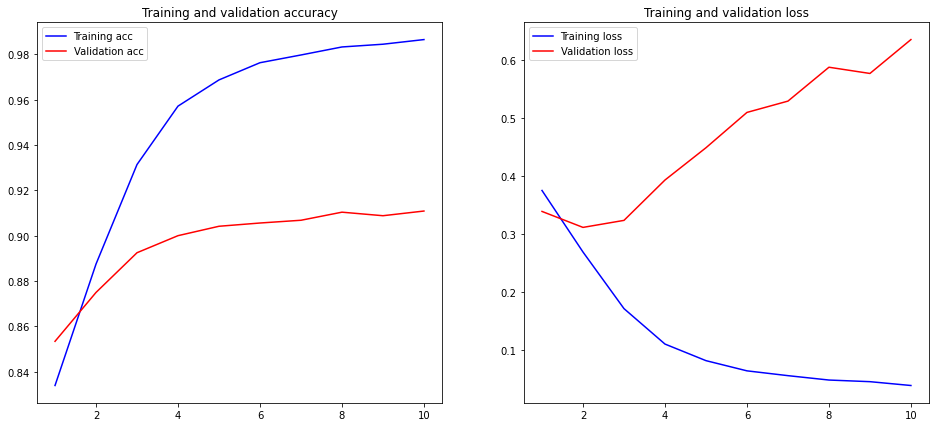

In [48]:
# Training the model for the eigteenth experiment
%time h017 = train_model(m017, x_train_sec, one_hot_labels)
plot_history(h017)

# Building the first model with Embedding layer, 30% dropout and one hidden layer

In [49]:
# Nineteenth Experiment with Embedding & Dense Classifier
m018 = Sequential()
m018.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m018.add(Flatten())
m018.add(Dense(128, activation = 'relu'))
m018.add(Dropout(0.3))

m018.add(Dense(2, activation = 'softmax'))
m018.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m018.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 50, 300)           300000    
                                                                 
 flatten_18 (Flatten)        (None, 15000)             0         
                                                                 
 dense_48 (Dense)            (None, 128)               1920128   
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 2)                 258       
                                                                 
Total params: 2,220,386
Trainable params: 2,220,386
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 61s 26ms/step - loss: 0.3773 - acc: 0.8335 - val_loss: 0.3391 - val_acc: 0.8527
Epoch 2/10
2311/2311 [==============================] - 59s 26ms/step - loss: 0.2723 - acc: 0.8860 - val_loss: 0.3091 - val_acc: 0.8747
Epoch 3/10
2311/2311 [==============================] - 59s 26ms/step - loss: 0.1802 - acc: 0.9271 - val_loss: 0.3305 - val_acc: 0.8841
Epoch 4/10
2311/2311 [==============================] - 59s 25ms/step - loss: 0.1209 - acc: 0.9522 - val_loss: 0.3679 - val_acc: 0.8991
Epoch 5/10
2311/2311 [==============================] - 60s 26ms/step - loss: 0.0941 - acc: 0.9628 - val_loss: 0.4381 - val_acc: 0.8989
Epoch 6/10
2311/2311 [==============================] - 59s 25ms/step - loss: 0.0752 - acc: 0.9709 - val_loss: 0.4563 - val_acc: 0.9062
Epoch 7/10
2311/2311 [==============================] - 59s 25ms/step - loss: 0.0674 - acc: 0.9749 - val_loss: 0.4692 - val_acc: 0.9077
Epoch 8/10
2311/2311 [==========================

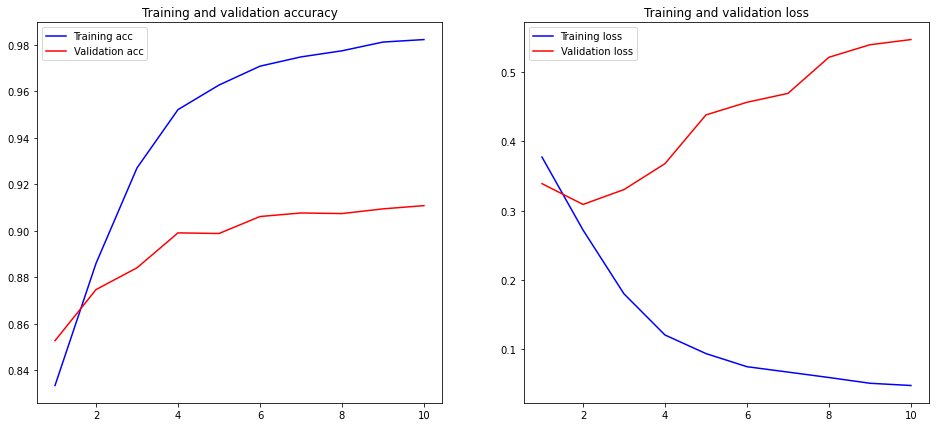

In [50]:
# Training the model for the nineteenth experiment
%time h018 = train_model(m018, x_train_sec, one_hot_labels)
plot_history(h018)

# Experiment  second model with Embedding and LSTM

In [51]:
# Second model: Embedding -> LSTM -> Dense classifier
m10 = Sequential()
m10.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m10.add(LSTM(DEPTH))
m10.add(Dense(2, activation = 'softmax'))
m10.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m10.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 50, 300)           300000    
                                                                 
 lstm (LSTM)                 (None, 300)               721200    
                                                                 
 dense_50 (Dense)            (None, 2)                 602       
                                                                 
Total params: 1,021,802
Trainable params: 1,021,802
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 880s 380ms/step - loss: 0.4013 - acc: 0.8227 - val_loss: 0.3849 - val_acc: 0.8230
Epoch 2/10
2311/2311 [==============================] - 876s 379ms/step - loss: 0.3455 - acc: 0.8479 - val_loss: 0.3346 - val_acc: 0.8530
Epoch 3/10
2311/2311 [==============================] - 878s 380ms/step - loss: 0.3116 - acc: 0.8641 - val_loss: 0.3173 - val_acc: 0.8615
Epoch 4/10
2311/2311 [==============================] - 879s 380ms/step - loss: 0.2824 - acc: 0.8788 - val_loss: 0.3091 - val_acc: 0.8646
Epoch 5/10
2311/2311 [==============================] - 880s 381ms/step - loss: 0.2476 - acc: 0.8954 - val_loss: 0.2978 - val_acc: 0.8763
Epoch 6/10
2311/2311 [==============================] - 880s 381ms/step - loss: 0.2069 - acc: 0.9143 - val_loss: 0.2961 - val_acc: 0.8837
Epoch 7/10
2311/2311 [==============================] - 890s 385ms/step - loss: 0.1660 - acc: 0.9346 - val_loss: 0.2858 - val_acc: 0.8963
Epoch 8/10
2311/2311 [============

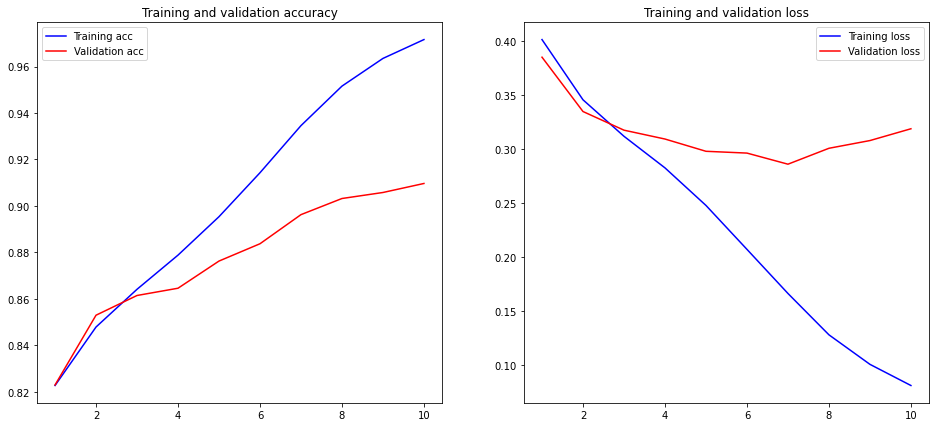

In [52]:
# Training the second model with Embedding--> LSTM--> Classifier
%time hm10 = train_model(m10, x_train_sec, one_hot_labels)
plot_history(hm10)

# Experiment second model with Embedding, LSTM, Dense classifer and 10% dropout

In [53]:
# Second model: Embedding -> LSTM -> Dense classifier -> Dropout
m11 = Sequential()
m11.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m11.add(LSTM(DEPTH))
m11.add(Dense(64))
m11.add(Dropout(0.1))
m11.add(Dense(2, activation = 'softmax'))
m11.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m11.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 50, 300)           300000    
                                                                 
 lstm_1 (LSTM)               (None, 300)               721200    
                                                                 
 dense_51 (Dense)            (None, 64)                19264     
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_52 (Dense)            (None, 2)                 130       
                                                                 
Total params: 1,040,594
Trainable params: 1,040,594
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 891s 384ms/step - loss: 0.4013 - acc: 0.8227 - val_loss: 0.3626 - val_acc: 0.8418
Epoch 2/10
2311/2311 [==============================] - 886s 383ms/step - loss: 0.3437 - acc: 0.8498 - val_loss: 0.3350 - val_acc: 0.8554
Epoch 3/10
2311/2311 [==============================] - 887s 384ms/step - loss: 0.3128 - acc: 0.8650 - val_loss: 0.3279 - val_acc: 0.8601
Epoch 4/10
2311/2311 [==============================] - 883s 382ms/step - loss: 0.2835 - acc: 0.8786 - val_loss: 0.3088 - val_acc: 0.8670
Epoch 5/10
2311/2311 [==============================] - 887s 384ms/step - loss: 0.2472 - acc: 0.8965 - val_loss: 0.3070 - val_acc: 0.8754
Epoch 6/10
2311/2311 [==============================] - 883s 382ms/step - loss: 0.2045 - acc: 0.9179 - val_loss: 0.2992 - val_acc: 0.8860
Epoch 7/10
2311/2311 [==============================] - 882s 382ms/step - loss: 0.1634 - acc: 0.9363 - val_loss: 0.2930 - val_acc: 0.8932
Epoch 8/10
2311/2311 [============

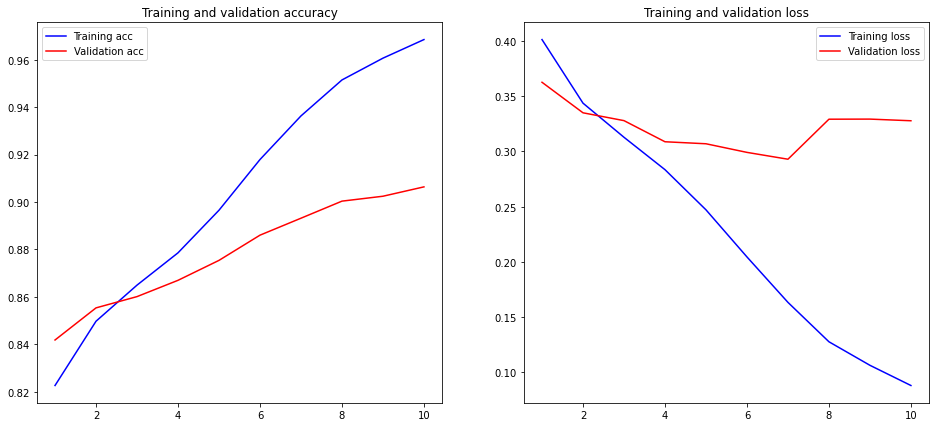

In [54]:
# Train the second model with Embedding--> LSTM--> Classifier--> 10% dropout
%time h11 = train_model(m11, x_train_sec, one_hot_labels)
plot_history(h11)

# Experiment second model with Embedding, LSTM, Dense classifier and 20% dropout

In [55]:
# Second model: Embedding -> LSTM -> Dense classifier -> Dropout
m12 = Sequential()
m12.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m12.add(LSTM(DEPTH))
m12.add(Dense(64))
m12.add(Dropout(0.2))
m12.add(Dense(2, activation = 'softmax'))
m12.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m12.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 50, 300)           300000    
                                                                 
 lstm_2 (LSTM)               (None, 300)               721200    
                                                                 
 dense_53 (Dense)            (None, 64)                19264     
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_54 (Dense)            (None, 2)                 130       
                                                                 
Total params: 1,040,594
Trainable params: 1,040,594
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 895s 386ms/step - loss: 0.4007 - acc: 0.8224 - val_loss: 0.3630 - val_acc: 0.8435
Epoch 2/10
2311/2311 [==============================] - 892s 386ms/step - loss: 0.3416 - acc: 0.8527 - val_loss: 0.3317 - val_acc: 0.8548
Epoch 3/10
2311/2311 [==============================] - 899s 389ms/step - loss: 0.3122 - acc: 0.8650 - val_loss: 0.3236 - val_acc: 0.8600
Epoch 4/10
2311/2311 [==============================] - 897s 388ms/step - loss: 0.2830 - acc: 0.8789 - val_loss: 0.3195 - val_acc: 0.8675
Epoch 5/10
2311/2311 [==============================] - 897s 388ms/step - loss: 0.2487 - acc: 0.8962 - val_loss: 0.3006 - val_acc: 0.8754
Epoch 6/10
2311/2311 [==============================] - 899s 389ms/step - loss: 0.2081 - acc: 0.9158 - val_loss: 0.2943 - val_acc: 0.8851
Epoch 7/10
2311/2311 [==============================] - 897s 388ms/step - loss: 0.1677 - acc: 0.9351 - val_loss: 0.2948 - val_acc: 0.8959
Epoch 8/10
2311/2311 [============

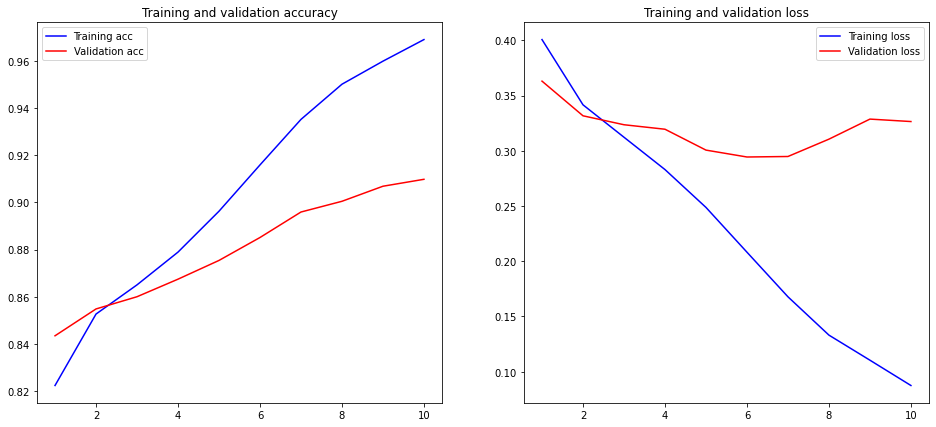

In [56]:
# Train the second model with Embedding--> LSTM--> Classifier--> 20% dropout
%time h12 = train_model(m12, x_train_sec, one_hot_labels)
plot_history(h12)

# Experiment second model with Embedding, LSTM, Dense classifier and 30% dropout

In [57]:
# Second model: Embedding -> LSTM -> Dense classifier -> Dropout
m13 = Sequential()
m13.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m13.add(LSTM(DEPTH))
m13.add(Dense(64))
m13.add(Dropout(0.3))
m13.add(Dense(2, activation = 'softmax'))
m13.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m13.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 50, 300)           300000    
                                                                 
 lstm_3 (LSTM)               (None, 300)               721200    
                                                                 
 dense_55 (Dense)            (None, 64)                19264     
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_56 (Dense)            (None, 2)                 130       
                                                                 
Total params: 1,040,594
Trainable params: 1,040,594
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 909s 392ms/step - loss: 0.4039 - acc: 0.8213 - val_loss: 0.3753 - val_acc: 0.8311
Epoch 2/10
2311/2311 [==============================] - 904s 391ms/step - loss: 0.3428 - acc: 0.8509 - val_loss: 0.3324 - val_acc: 0.8546
Epoch 3/10
2311/2311 [==============================] - 905s 391ms/step - loss: 0.3124 - acc: 0.8650 - val_loss: 0.3187 - val_acc: 0.8626
Epoch 4/10
2311/2311 [==============================] - 908s 393ms/step - loss: 0.2837 - acc: 0.8776 - val_loss: 0.3079 - val_acc: 0.8671
Epoch 5/10
2311/2311 [==============================] - 902s 390ms/step - loss: 0.2488 - acc: 0.8950 - val_loss: 0.3027 - val_acc: 0.8752
Epoch 6/10
2311/2311 [==============================] - 903s 391ms/step - loss: 0.2065 - acc: 0.9157 - val_loss: 0.3045 - val_acc: 0.8863
Epoch 7/10
2311/2311 [==============================] - 904s 391ms/step - loss: 0.1640 - acc: 0.9357 - val_loss: 0.2991 - val_acc: 0.8948
Epoch 8/10
2311/2311 [============

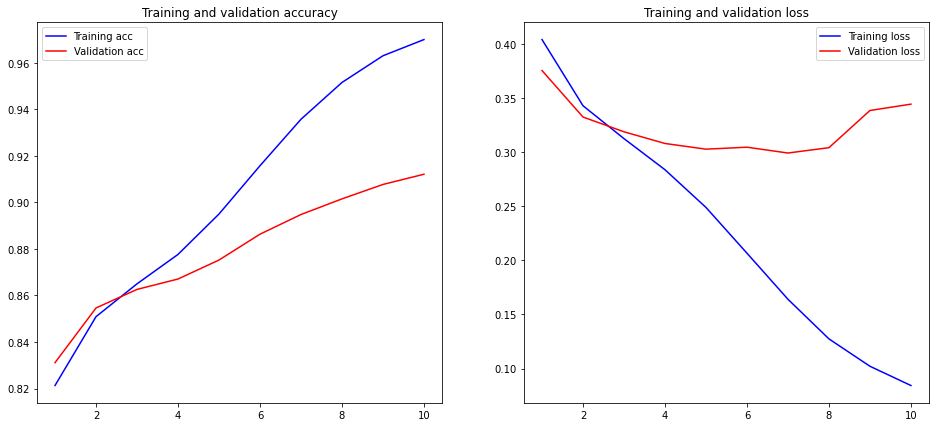

In [58]:
# Train the second model with Embedding--> LSTM--> Classifier--> 30% dropout
%time h13 = train_model(m13, x_train_sec, one_hot_labels)
plot_history(h13)

# Experiment second model with Embedding, LSTM, Incresed Dense classifier and 10% dropout

In [59]:
# Second model: Embedding -> LSTM -> Dense classifier -> Dropout
m14 = Sequential()
m14.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m14.add(LSTM(DEPTH))
m14.add(Dense(128))
m14.add(Dropout(0.1))
m14.add(Dense(2, activation = 'softmax'))
m14.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m14.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 50, 300)           300000    
                                                                 
 lstm_4 (LSTM)               (None, 300)               721200    
                                                                 
 dense_57 (Dense)            (None, 128)               38528     
                                                                 
 dropout_34 (Dropout)        (None, 128)               0         
                                                                 
 dense_58 (Dense)            (None, 2)                 258       
                                                                 
Total params: 1,059,986
Trainable params: 1,059,986
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 1042s 450ms/step - loss: 0.3952 - acc: 0.8246 - val_loss: 0.3627 - val_acc: 0.8399
Epoch 2/10
2311/2311 [==============================] - 975s 422ms/step - loss: 0.3449 - acc: 0.8492 - val_loss: 0.3414 - val_acc: 0.8486
Epoch 3/10
2311/2311 [==============================] - 970s 420ms/step - loss: 0.3143 - acc: 0.8634 - val_loss: 0.3182 - val_acc: 0.8605
Epoch 4/10
2311/2311 [==============================] - 990s 429ms/step - loss: 0.2864 - acc: 0.8770 - val_loss: 0.3122 - val_acc: 0.8646
Epoch 5/10
2311/2311 [==============================] - 908s 393ms/step - loss: 0.2537 - acc: 0.8937 - val_loss: 0.2985 - val_acc: 0.8765
Epoch 6/10
2311/2311 [==============================] - 909s 394ms/step - loss: 0.2122 - acc: 0.9139 - val_loss: 0.2994 - val_acc: 0.8839
Epoch 7/10
2311/2311 [==============================] - 907s 392ms/step - loss: 0.1683 - acc: 0.9338 - val_loss: 0.2958 - val_acc: 0.8943
Epoch 8/10
2311/2311 [===========

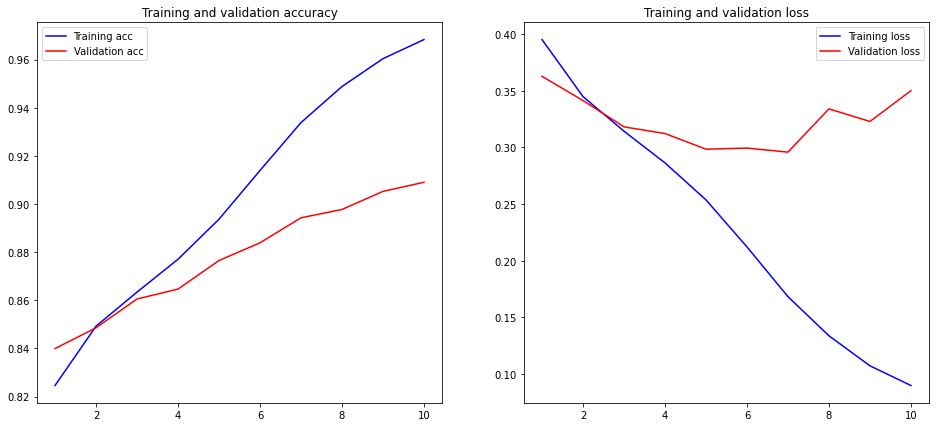

In [60]:
# Train the second model with Embedding--> LSTM-->Hidden Layer--> Dense Classifier
%time h14 = train_model(m14, x_train_sec, one_hot_labels)
plot_history(h14)

# Experiment second model with Embedding, LSTM, Incresed Dense classifier and 20% dropout

In [61]:
# Second model: Embedding -> LSTM -> Dense classifier -> Dropout
m15 = Sequential()
m15.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m15.add(LSTM(DEPTH))
m15.add(Dense(128))
m15.add(Dropout(0.2))
m15.add(Dense(2, activation = 'softmax'))
m15.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m15.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 50, 300)           300000    
                                                                 
 lstm_5 (LSTM)               (None, 300)               721200    
                                                                 
 dense_59 (Dense)            (None, 128)               38528     
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_60 (Dense)            (None, 2)                 258       
                                                                 
Total params: 1,059,986
Trainable params: 1,059,986
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 935s 404ms/step - loss: 0.3976 - acc: 0.8232 - val_loss: 0.3728 - val_acc: 0.8280
Epoch 2/10
2311/2311 [==============================] - 931s 403ms/step - loss: 0.3424 - acc: 0.8507 - val_loss: 0.3341 - val_acc: 0.8557
Epoch 3/10
2311/2311 [==============================] - 929s 402ms/step - loss: 0.3122 - acc: 0.8642 - val_loss: 0.3194 - val_acc: 0.8619
Epoch 4/10
2311/2311 [==============================] - 931s 403ms/step - loss: 0.2821 - acc: 0.8799 - val_loss: 0.3138 - val_acc: 0.8649
Epoch 5/10
2311/2311 [==============================] - 931s 403ms/step - loss: 0.2448 - acc: 0.8974 - val_loss: 0.2955 - val_acc: 0.8769
Epoch 6/10
2311/2311 [==============================] - 937s 405ms/step - loss: 0.1994 - acc: 0.9202 - val_loss: 0.2943 - val_acc: 0.8880
Epoch 7/10
2311/2311 [==============================] - 950s 411ms/step - loss: 0.1581 - acc: 0.9392 - val_loss: 0.2882 - val_acc: 0.8911
Epoch 8/10
2311/2311 [============

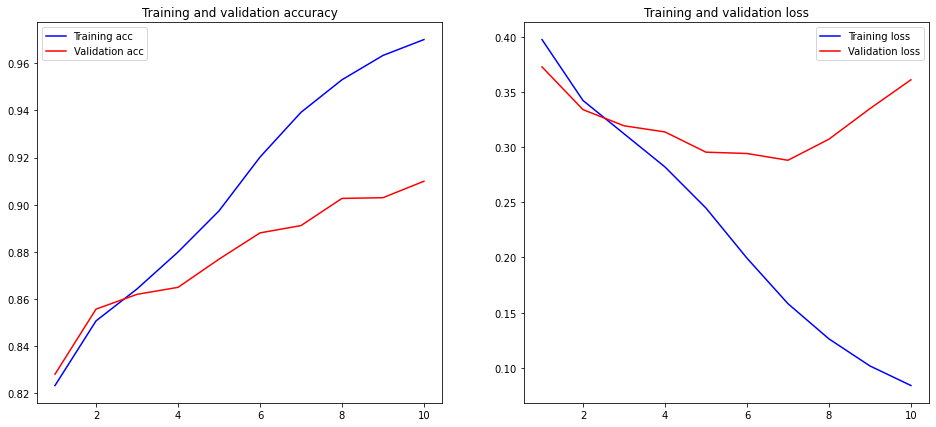

In [62]:
# Train second model with Embedding--> LSTM-->Hidden Layer-->Dropout--> Dense Classifier
%time h15 = train_model(m15, x_train_sec, one_hot_labels)
plot_history(h15)

# Experiment third model with Embedding and GRU

In [63]:
from keras.layers import GRU

# Third model: Embedding -> GRU -> Dense classifier
m30 = Sequential()
m30.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m30.add(GRU(LENGTH))
m30.add(Dense(2, activation = 'softmax'))
m30.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m30.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 50, 300)           300000    
                                                                 
 gru (GRU)                   (None, 50)                52800     
                                                                 
 dense_61 (Dense)            (None, 2)                 102       
                                                                 
Total params: 352,902
Trainable params: 352,902
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 142s 60ms/step - loss: 0.3919 - acc: 0.8242 - val_loss: 0.3526 - val_acc: 0.8441
Epoch 2/10
2311/2311 [==============================] - 138s 60ms/step - loss: 0.3332 - acc: 0.8534 - val_loss: 0.3293 - val_acc: 0.8588
Epoch 3/10
2311/2311 [==============================] - 138s 60ms/step - loss: 0.3028 - acc: 0.8684 - val_loss: 0.3131 - val_acc: 0.8630
Epoch 4/10
2311/2311 [==============================] - 137s 59ms/step - loss: 0.2798 - acc: 0.8793 - val_loss: 0.3059 - val_acc: 0.8682
Epoch 5/10
2311/2311 [==============================] - 138s 60ms/step - loss: 0.2566 - acc: 0.8904 - val_loss: 0.3015 - val_acc: 0.8730
Epoch 6/10
2311/2311 [==============================] - 139s 60ms/step - loss: 0.2317 - acc: 0.9032 - val_loss: 0.3051 - val_acc: 0.8748
Epoch 7/10
2311/2311 [==============================] - 140s 61ms/step - loss: 0.2063 - acc: 0.9170 - val_loss: 0.3054 - val_acc: 0.8795
Epoch 8/10
2311/2311 [===================

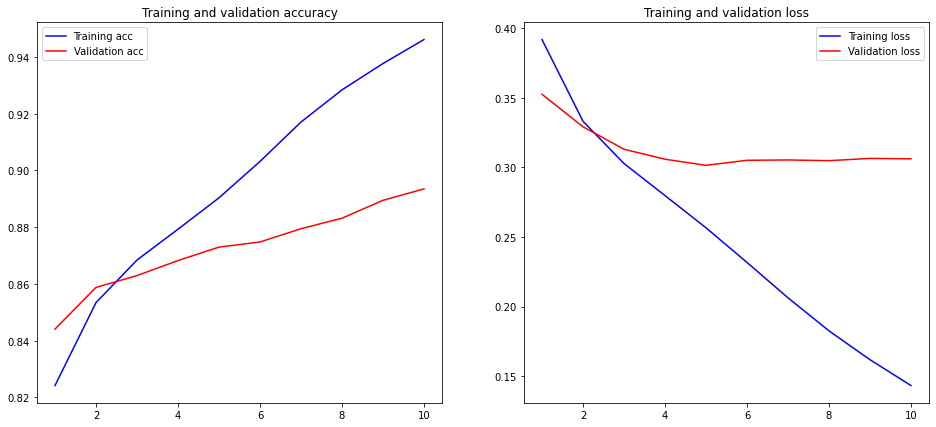

In [64]:
# Train the third model with Embedding & GRU
%time h30 = train_model(m30, x_train_sec, one_hot_labels)
plot_history(h30)

# Experiment third model with Embedding, GRU and Dense Classifier

In [65]:
# Third model: Embedding -> GRU -> Dense classifier
m31 = Sequential()
m31.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m31.add(GRU(LENGTH))
m31.add(Dense(128))
m31.add(Dropout(0.2))
m31.add(Dense(2, activation = 'softmax'))
m31.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m31.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 50, 300)           300000    
                                                                 
 gru_1 (GRU)                 (None, 50)                52800     
                                                                 
 dense_62 (Dense)            (None, 128)               6528      
                                                                 
 dropout_36 (Dropout)        (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 2)                 258       
                                                                 
Total params: 359,586
Trainable params: 359,586
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 144s 61ms/step - loss: 0.3941 - acc: 0.8244 - val_loss: 0.3510 - val_acc: 0.8436
Epoch 2/10
2311/2311 [==============================] - 141s 61ms/step - loss: 0.3343 - acc: 0.8527 - val_loss: 0.3224 - val_acc: 0.8581
Epoch 3/10
2311/2311 [==============================] - 142s 62ms/step - loss: 0.3047 - acc: 0.8676 - val_loss: 0.3150 - val_acc: 0.8636
Epoch 4/10
2311/2311 [==============================] - 144s 62ms/step - loss: 0.2810 - acc: 0.8802 - val_loss: 0.3057 - val_acc: 0.8681
Epoch 5/10
2311/2311 [==============================] - 142s 62ms/step - loss: 0.2570 - acc: 0.8917 - val_loss: 0.3069 - val_acc: 0.8687
Epoch 6/10
2311/2311 [==============================] - 142s 61ms/step - loss: 0.2310 - acc: 0.9047 - val_loss: 0.2974 - val_acc: 0.8784
Epoch 7/10
2311/2311 [==============================] - 142s 61ms/step - loss: 0.2035 - acc: 0.9184 - val_loss: 0.3061 - val_acc: 0.8836
Epoch 8/10
2311/2311 [===================

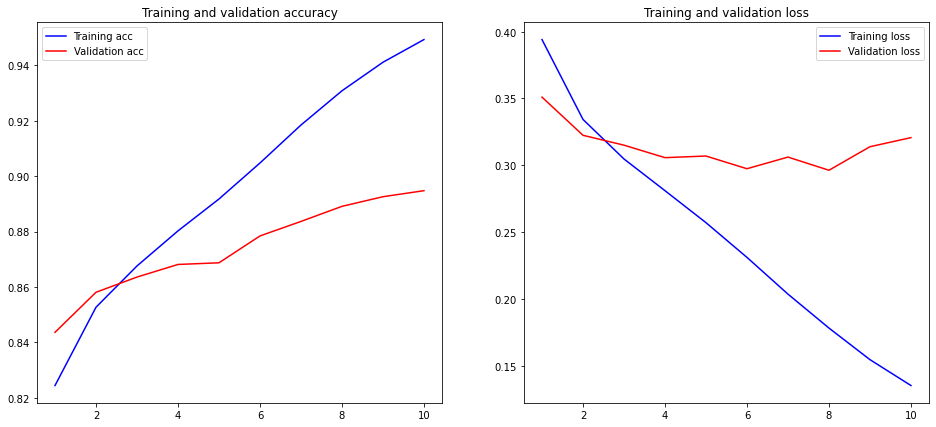

In [66]:
# Train the third model with Embedding--> GRU-->Hidden Layer--> Dense Classifier
%time h31 = train_model(m31, x_train_sec, one_hot_labels)
plot_history(h31)

# Experiment fourth model with Embedding, GRU and Dense Classifier

In [67]:
# Fourth model: Embedding -> GRU with dropouts -> Dense classifier
m40 = Sequential()
m40.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m40.add(GRU(DEPTH, dropout = 0.3, recurrent_dropout = 0.3))
m40.add(Dense(2, activation = 'softmax'))
m40.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m40.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 50, 300)           300000    
                                                                 
 gru_2 (GRU)                 (None, 300)               541800    
                                                                 
 dense_64 (Dense)            (None, 2)                 602       
                                                                 
Total params: 842,402
Trainable params: 842,402
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 1531s 661ms/step - loss: 0.3923 - acc: 0.8244 - val_loss: 0.3503 - val_acc: 0.8447
Epoch 2/10
2311/2311 [==============================] - 1515s 655ms/step - loss: 0.3308 - acc: 0.8530 - val_loss: 0.3231 - val_acc: 0.8597
Epoch 3/10
2311/2311 [==============================] - 1509s 653ms/step - loss: 0.3011 - acc: 0.8690 - val_loss: 0.3052 - val_acc: 0.8672
Epoch 4/10
2311/2311 [==============================] - 1582s 685ms/step - loss: 0.2757 - acc: 0.8818 - val_loss: 0.2999 - val_acc: 0.8714
Epoch 5/10
2311/2311 [==============================] - 1648s 713ms/step - loss: 0.2518 - acc: 0.8931 - val_loss: 0.2864 - val_acc: 0.8789
Epoch 6/10
2311/2311 [==============================] - 1728s 748ms/step - loss: 0.2305 - acc: 0.9036 - val_loss: 0.2818 - val_acc: 0.8831
Epoch 7/10
2311/2311 [==============================] - 1760s 762ms/step - loss: 0.2116 - acc: 0.9128 - val_loss: 0.2855 - val_acc: 0.8871
Epoch 8/10
2311/2311 [=====

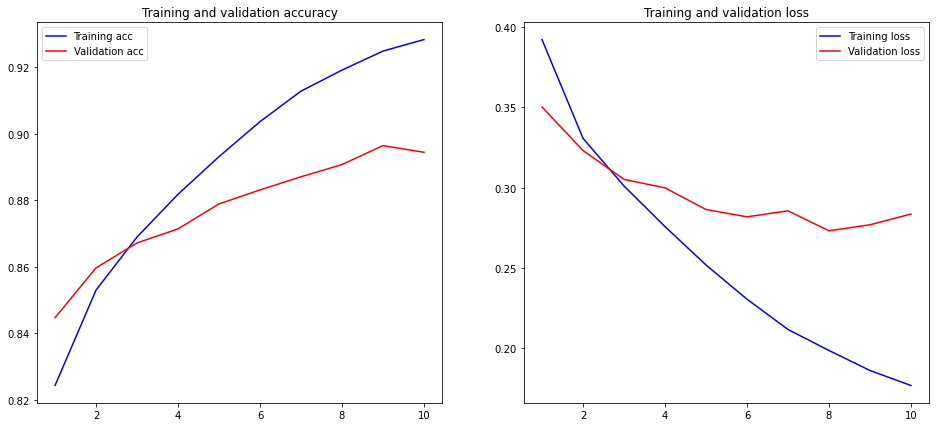

In [68]:
# Train the fourth model with Embedding--> GRU--> Dropout--> Dense Classifier
%time h40 = train_model(m40, x_train_sec, one_hot_labels)
plot_history(h40)

# Experiment fifth model using Embedding,  Stack of GRU layers, Dense Classifier

In [69]:
# Fifth model: Embedding -> Stack of GRU layers -> Dense classifier
m50 = Sequential()
m50.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m50.add(GRU(DEPTH, dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True))
m50.add(GRU(DEPTH, activation = 'relu', dropout = 0.2, recurrent_dropout = 0.2))
m50.add(Dense(2, activation = 'softmax'))
m50.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m50.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 50, 300)           300000    
                                                                 
 gru_3 (GRU)                 (None, 50, 300)           541800    
                                                                 
 gru_4 (GRU)                 (None, 300)               541800    
                                                                 
 dense_65 (Dense)            (None, 2)                 602       
                                                                 
Total params: 1,384,202
Trainable params: 1,384,202
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2311/2311 [==============================] - 3918s 2s/step - loss: 0.3922 - acc: 0.8241 - val_loss: 0.3492 - val_acc: 0.8447
Epoch 2/10
2311/2311 [==============================] - 3923s 2s/step - loss: 0.3272 - acc: 0.8560 - val_loss: 0.3209 - val_acc: 0.8590
Epoch 3/10
2311/2311 [==============================] - 3911s 2s/step - loss: 0.2970 - acc: 0.8707 - val_loss: 0.3033 - val_acc: 0.8674
Epoch 4/10
2311/2311 [==============================] - 3907s 2s/step - loss: 0.2676 - acc: 0.8861 - val_loss: 0.3021 - val_acc: 0.8733
Epoch 5/10
2311/2311 [==============================] - 3904s 2s/step - loss: 0.2354 - acc: 0.9010 - val_loss: 0.2845 - val_acc: 0.8846
Epoch 6/10
2311/2311 [==============================] - 3917s 2s/step - loss: 0.2044 - acc: 0.9166 - val_loss: 0.2726 - val_acc: 0.8924
Epoch 7/10
2311/2311 [==============================] - 3915s 2s/step - loss: 0.1800 - acc: 0.9281 - val_loss: 0.2752 - val_acc: 0.8939
Epoch 8/10
2311/2311 [==========================

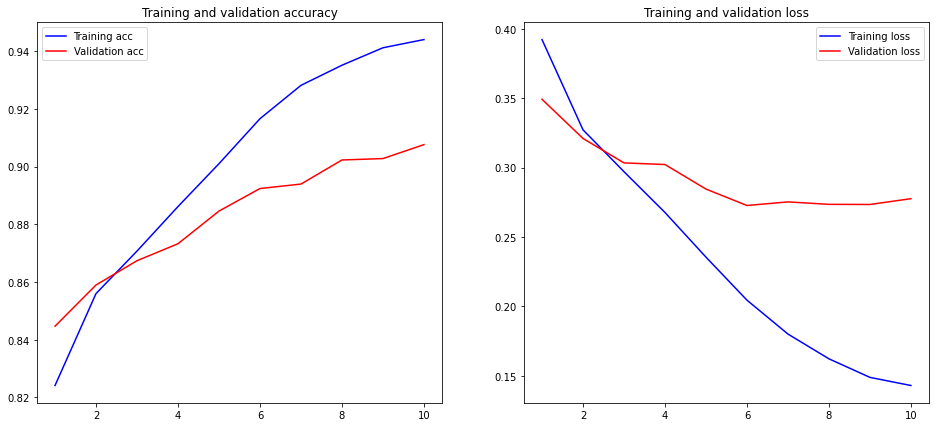

In [70]:
# Train the fifth model with Embedding--> Stack of GRU --> Dense Classifier
%time h50 = train_model(m50, x_train_sec, one_hot_labels)
plot_history(h50)

# Experimenting sixth model with Embedding, CONVID, MAXPOOLING, GLOBALMAXPOOLING

In [71]:
# Sixth model: Embedding -> Conv1D & MaxPooling1D -> Dense classifier
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
m60 = Sequential()
m60.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m60.add(Conv1D(DEPTH, 7, activation = 'relu'))
m60.add(MaxPooling1D(5))
m60.add(Conv1D(DEPTH, 7, activation = 'relu'))
m60.add(GlobalMaxPooling1D())
m60.add(Dense(2, activation = 'softmax'))
m60.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m60.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 50, 300)           300000    
                                                                 
 conv1d (Conv1D)             (None, 44, 300)           630300    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 300)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 300)            630300    
                                                                 
 global_max_pooling1d (Globa  (None, 300)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_66 (Dense)            (None, 2)               

Epoch 1/10
2311/2311 [==============================] - 705s 305ms/step - loss: 0.3788 - acc: 0.8291 - val_loss: 0.3388 - val_acc: 0.8513
Epoch 2/10
2311/2311 [==============================] - 701s 303ms/step - loss: 0.2895 - acc: 0.8783 - val_loss: 0.3079 - val_acc: 0.8716
Epoch 3/10
2311/2311 [==============================] - 658s 285ms/step - loss: 0.1849 - acc: 0.9281 - val_loss: 0.2653 - val_acc: 0.9013
Epoch 4/10
2311/2311 [==============================] - 610s 264ms/step - loss: 0.0966 - acc: 0.9639 - val_loss: 0.3076 - val_acc: 0.9097
Epoch 5/10
2311/2311 [==============================] - 611s 264ms/step - loss: 0.0622 - acc: 0.9771 - val_loss: 0.3829 - val_acc: 0.9100
Epoch 6/10
2311/2311 [==============================] - 612s 265ms/step - loss: 0.0489 - acc: 0.9822 - val_loss: 0.4364 - val_acc: 0.9148
Epoch 7/10
2311/2311 [==============================] - 613s 265ms/step - loss: 0.0431 - acc: 0.9844 - val_loss: 0.4565 - val_acc: 0.9109
Epoch 8/10
2311/2311 [============

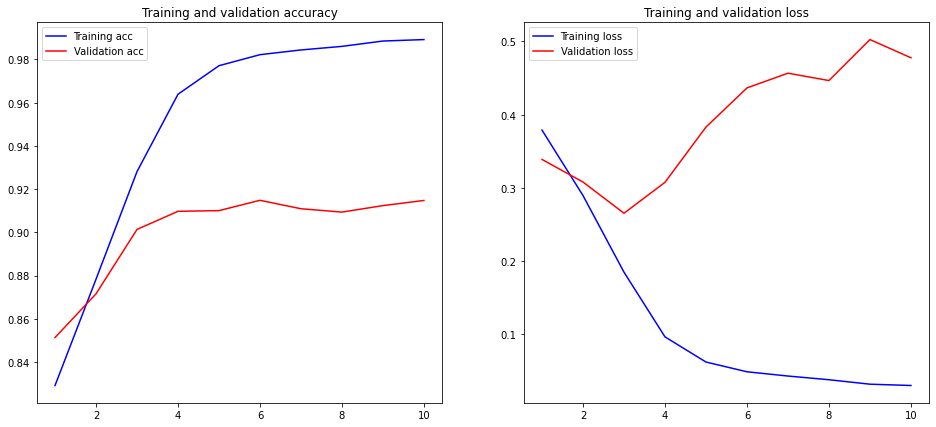

In [72]:
# Train the sixth model with Embedding--> CONV1D --> MAXPOOLING --> GLOBALMAXPOOLING1D--> Dense Classifier
%time h60 = train_model(m60, x_train_sec, one_hot_labels)
plot_history(h60)

# Experimenting with Embedding, 2 layers of CONVID, MaxPooling, GRU

In [73]:
# Seventh model: Embedding -> 2 x Conv1D + MaxPooling -> GRU -> Dense
m70 = Sequential()
m70.add(Embedding(WORDS, DEPTH, input_length = LENGTH))
m70.add(Conv1D(DEPTH, 5, activation = 'relu'))
m70.add(MaxPooling1D(5))
m70.add(Conv1D(DEPTH, 7, activation = 'relu'))
m70.add(GRU(DEPTH, dropout = 0.1, recurrent_dropout = 0.3))
m70.add(Dense(2, activation = 'softmax'))
m70.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
m70.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 50, 300)           300000    
                                                                 
 conv1d_2 (Conv1D)           (None, 46, 300)           450300    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 9, 300)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 3, 300)            630300    
                                                                 
 gru_5 (GRU)                 (None, 300)               541800    
                                                                 
 dense_67 (Dense)            (None, 2)                 602       
                                                     

Epoch 1/10
2311/2311 [==============================] - 629s 270ms/step - loss: 0.3782 - acc: 0.8308 - val_loss: 0.3387 - val_acc: 0.8517
Epoch 2/10
2311/2311 [==============================] - 623s 269ms/step - loss: 0.3046 - acc: 0.8700 - val_loss: 0.3064 - val_acc: 0.8699
Epoch 3/10
2311/2311 [==============================] - 621s 269ms/step - loss: 0.2273 - acc: 0.9102 - val_loss: 0.2888 - val_acc: 0.8894
Epoch 4/10
2311/2311 [==============================] - 622s 269ms/step - loss: 0.1488 - acc: 0.9456 - val_loss: 0.2778 - val_acc: 0.9030
Epoch 5/10
2311/2311 [==============================] - 623s 269ms/step - loss: 0.0976 - acc: 0.9653 - val_loss: 0.2955 - val_acc: 0.9085
Epoch 6/10
2311/2311 [==============================] - 622s 269ms/step - loss: 0.0693 - acc: 0.9760 - val_loss: 0.3389 - val_acc: 0.9130
Epoch 7/10
2311/2311 [==============================] - 621s 269ms/step - loss: 0.0556 - acc: 0.9804 - val_loss: 0.3477 - val_acc: 0.9128
Epoch 8/10
2311/2311 [============

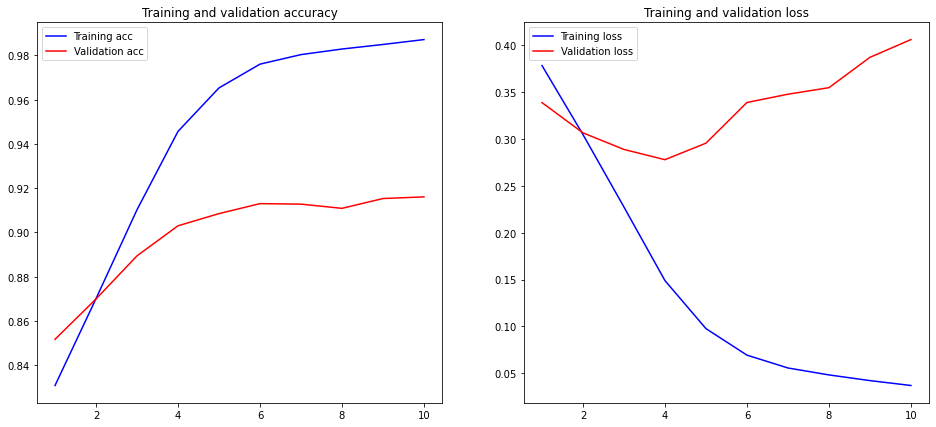

In [74]:
# Train the seventh model with Embedding --> 2X CONV1D + MAXPOOLING --> GRU --> Dense Classifier
%time h70 = train_model(m70, x_train_sec, one_hot_labels)
plot_history(h70)